# Assignment 2
## Q1. Three-Variable Boolean Function Learning using a Neural Network

Designing a simple neural network from scratch (without using any external libraries) to learn a Boolean function with three variables. The steps are:

1. **Input**: Defining three Boolean variables.
2. **Generating Data**: Creating training examples for the Boolean functions.
3. **Model Training**: Building and training a neural network to learn the functions.
4. **Verification**: Testing the network on five separate Boolean functions and verifying the results.

Observing behavior of the network using a custom implementation of gradient descent.

---

### **Step 1: Defining Activation Functions**

This step involves importing the required libraries and defining the activation functions, such as the sigmoid function, its derivative, and a binary threshold activation function. These functions will be used everytime for training and prediction phases of our neural network.


In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function for forward propagation
def apply_sigmoid(val):
    return 1 / (1 + np.exp(-val))

# Derivative of the sigmoid function (used during backpropagation)
def sigmoid_derivative(output):
    return output * (1 - output)

# Custom binary activation function (0 or 1 based on threshold)
def binary_threshold_activation(val):
    return 1 if val > 0.5 else 0


### **Step 2: Neural Network Initialization and Training**

We will give random weights between the input layer and the hidden layer, as well as between the hidden layer and the output. The training process will use **backpropagation** and **gradient descent** to minimize the error between predicted and actual values.

The neural network has:
- 3 input neurons for each Boolean variable.
- A hidden layer with 4 neurons.
- 1 output neuron for the Boolean function result.


In [121]:
# Prepare the input-output dataset for the Boolean function
def prepare_dataset(bool_fn):
    inputs = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                       [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])

    # Apply the Boolean function to the inputs to produce outputs
    outputs = np.array([bool_fn(*inp) for inp in inputs])

    return inputs, outputs.reshape(-1, 1)  # Reshape for consistency in matrix operations

# Function to plot the error over training epochs
def visualize_training_errors(errors_list):
    plt.plot(errors_list, label="Training Error")
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.title('Training Error Progression')
    plt.legend()
    plt.show()

# Train the neural network model
def execute_training(X, y, max_epochs=10000, lr=0.1):
    np.random.seed(123)  # Set random seed for reproducibility

    # Randomly initialize weights for both input-to-hidden and hidden-to-output layers
    w_input_hidden = np.random.rand(3, 4)  # 3 input features, 4 neurons in the hidden layer
    w_hidden_output = np.random.rand(4, 1)  # 4 hidden neurons, 1 output

    error_list = []  # Store errors per epoch for plotting

    for epoch in range(max_epochs):
        # Forward pass: compute hidden layer output
        hidden_output = apply_sigmoid(np.dot(X, w_input_hidden))

        # Forward pass: compute final output
        final_pred = apply_sigmoid(np.dot(hidden_output, w_hidden_output))

        # Calculate error (difference between actual and predicted)
        error = y - final_pred

        # Store the mean error for this epoch
        error_list.append(np.mean(np.abs(error)))

        # Backpropagation: compute error gradient for output layer
        output_delta = error * sigmoid_derivative(final_pred)

        # Backpropagation: compute error gradient for hidden layer
        hidden_error = output_delta.dot(w_hidden_output.T) * sigmoid_derivative(hidden_output)

        # Update weights (hidden to output) using the learning rate
        w_hidden_output += hidden_output.T.dot(output_delta) * lr

        # Update weights (input to hidden)
        w_input_hidden += X.T.dot(hidden_error) * lr

    # After training, plot the error progression
    visualize_training_errors(error_list)

    return w_input_hidden, w_hidden_output


### **Step 3: Prediction Function**

After training the neural network, we will use the weights to perform **forward propagation** and predict the outputs for the given Boolean function. The outputs are converted to binary values using a step function to match the expected binary output (0 or 1).


In [122]:
# Function to make predictions using the trained neural network
def make_nn_predictions(X, w_input_hidden, w_hidden_output):
    # Hidden layer computations
    hidden_layer_out = apply_sigmoid(np.dot(X, w_input_hidden))

    # Output layer computations
    final_output = apply_sigmoid(np.dot(hidden_layer_out, w_hidden_output))

    # Convert predictions to binary (0 or 1)
    return np.vectorize(binary_threshold_activation)(final_output)


### **Step 4: Boolean Functions**

Here, we will define five distinct Boolean functions to test the neural network. Each function takes three inputs (`a`, `b`, `c`) and returns a Boolean value based on logical operations like AND, OR, and NOT.


In [123]:
# Various three-variable Boolean functions
def bool_function_a(a, b, c):
    return a or b or c

def bool_function_b(a, b, c):
    return a and b or c

def bool_function_c(a, b, c):
    return not (a or b or c)

def bool_function_d(a, b, c):
    return a and b and c

def bool_function_e(a, b, c):
    return not (a and b and c)


### **Step 5: Training and Verification**

We will train the neural network on the generated data for each Boolean function and verify the network so that it correctly predict the outputs. After training, the predicted outputs will be compared to the actual outputs.

For each Boolean function, the network goes through:
1. **Training**: Using the training examples to adjust the weights.
2. **Prediction**: Testing the model on the same data.
3. **Verification**: Comparing the predicted results with the actual Boolean function outputs.



Now training on Boolean function 1: bool_function_b


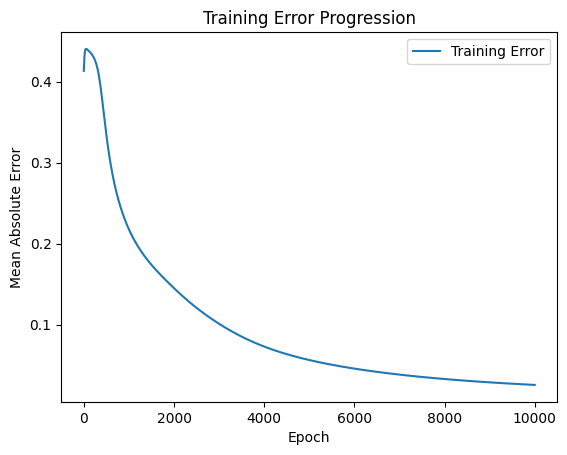

Predicted Outputs:  [0 1 0 1 0 1 1 1]
Actual Outputs:     [0 1 0 1 0 1 1 1]

Now training on Boolean function 2: bool_function_c


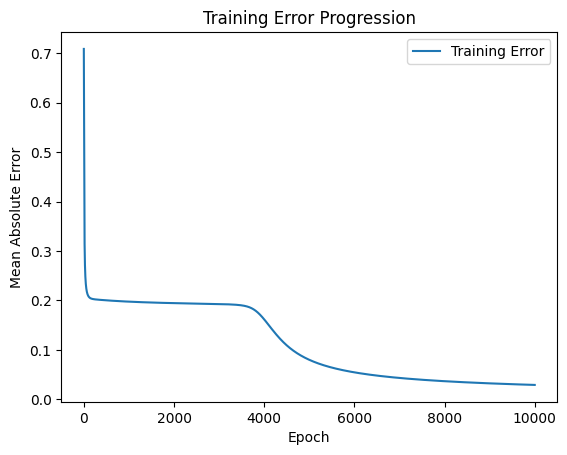

Predicted Outputs:  [1 0 0 0 0 0 0 0]
Actual Outputs:     [1 0 0 0 0 0 0 0]

Now training on Boolean function 3: bool_function_a


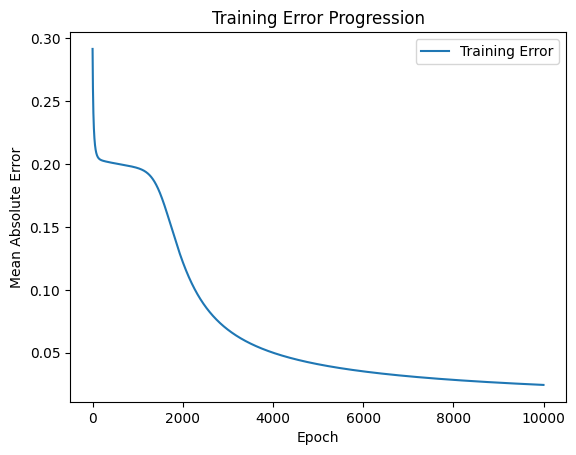

Predicted Outputs:  [0 1 1 1 1 1 1 1]
Actual Outputs:     [0 1 1 1 1 1 1 1]

Now training on Boolean function 4: bool_function_d


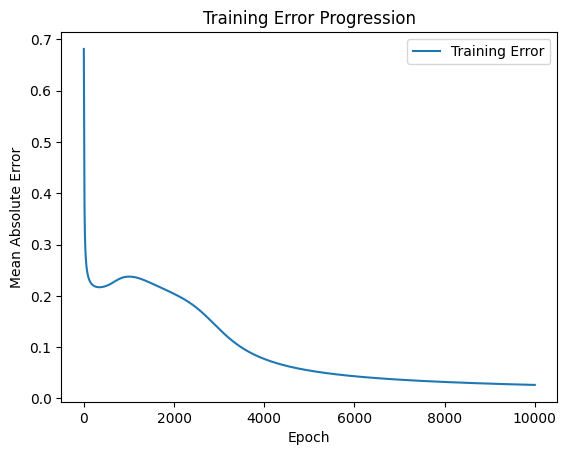

Predicted Outputs:  [0 0 0 0 0 0 0 1]
Actual Outputs:     [0 0 0 0 0 0 0 1]

Now training on Boolean function 5: bool_function_e


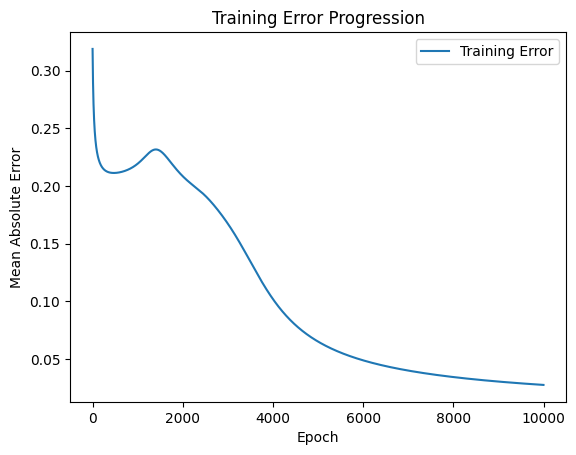

Predicted Outputs:  [1 1 1 1 1 1 1 0]
Actual Outputs:     [1 1 1 1 1 1 1 0]


In [124]:
# Define the list of Boolean functions for training and testing
bool_functions_list = [bool_function_b, bool_function_c, bool_function_a, bool_function_d, bool_function_e]

# Train and verify the neural network on each Boolean function
for idx, bool_fn in enumerate(bool_functions_list):
    print(f"\nNow training on Boolean function {idx + 1}: {bool_fn.__name__}")

    # Step 1: Prepare the training dataset
    X_train, y_train = prepare_dataset(bool_fn)

    # Step 2: Train the model on the dataset
    weights_input_hidden, weights_hidden_output = execute_training(X_train, y_train, max_epochs=10000)

    # Step 3: Predict outcomes on the training data
    predictions = make_nn_predictions(X_train, weights_input_hidden, weights_hidden_output)

    # Step 4: Display predicted and actual outcomes (in binary form)
    print("Predicted Outputs: ", predictions.flatten().astype(int))
    print("Actual Outputs:    ", y_train.flatten().astype(int))


## Q2

# Q2: Frozen Lake Q-learning Implementation
In this task, we aim to solve the frozen lake problem using Q-learning. The frozen lake is a grid-based environment where an agent navigates from the start position to the goal, avoiding holes. The grid can be of size NxN, and M holes are placed randomly.

## Part (a): Generate Random Frozen Lake Instance
We generate a frozen lake environment represented as an NxN grid where:
- "S" represents the start position
- "G" represents the goal
- "F" represents a frozen safe path
- "H" represents a hole

The function takes two parameters:
- N: Size of the lake (NxN)
- M: Number of holes (randomly placed)

The function ensures that the start and goal positions are not overwritten by holes.


S H F F F F
F H F H F F
F H F H F H
F F F F F H
H F F F F F
F F F F F G


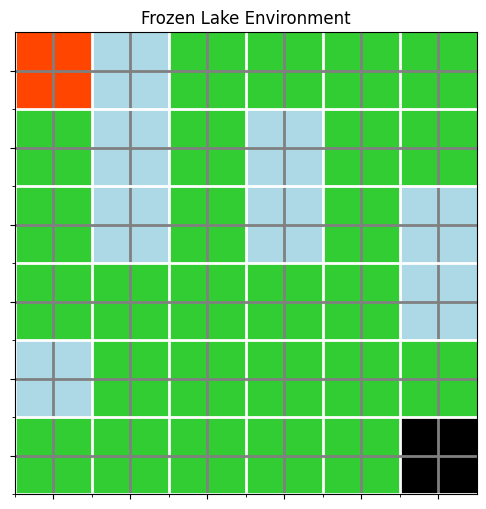

In [125]:


import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to generate a frozen lake environment with start, goal, and holes
def create_lake_env(size, num_holes):
    # Initialize an empty lake with frozen paths
    lake_map = [['F' for _ in range(size)] for _ in range(size)]

    # Set start (S) and goal (G) positions
    lake_map[0][0] = 'S'
    lake_map[size-1][size-1] = 'G'

    # Randomly place holes, avoiding start and goal positions
    hole_count = 0
    while hole_count < num_holes:
        row, col = random.randint(0, size-1), random.randint(0, size-1)
        if lake_map[row][col] == 'F' and (row, col) != (0, 0) and (row, col) != (size-1, size-1):
            lake_map[row][col] = 'H'
            hole_count += 1

    return lake_map

# Function to visualize the frozen lake using matplotlib
def visualize_lake(lake_map):
    size = len(lake_map)

    # Create a numeric representation of the lake map
    visual_map = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            if lake_map[i][j] == 'S':
                visual_map[i][j] = 1  # Start
            elif lake_map[i][j] == 'G':
                visual_map[i][j] = 2  # Goal
            elif lake_map[i][j] == 'H':
                visual_map[i][j] = -1 # Hole
            else:
                visual_map[i][j] = 0  # Frozen path

    # Define colors: Blue (Frozen), Green (Start), Red (Goal), Black (Holes)
    cmap = ListedColormap(['#ADD8E6', '#32CD32', '#FF4500', '#000000'])

    # Create the plot
    plt.figure(figsize=(6, 6))
    plt.imshow(visual_map, cmap=cmap, origin='upper', extent=[0, size, 0, size])

    # Adding grid lines for better visibility
    plt.grid(True, which='both', color='gray', linestyle='-', linewidth=2)

    # Customize the ticks and gridlines
    plt.xticks(np.arange(0.5, size, 1), [])
    plt.yticks(np.arange(0.5, size, 1), [])
    plt.gca().set_xticks(np.arange(0, size, 1), minor=True)
    plt.gca().set_yticks(np.arange(0, size, 1), minor=True)
    plt.gca().grid(which='minor', color='white', linestyle='-', linewidth=2)

    # Display the lake environment
    plt.title('Frozen Lake Environment')
    plt.show()

# Create and visualize the lake environment
lake_size = 6
holes_num = 8
lake = create_lake_env(lake_size, holes_num)

# Print the lake for reference
for row in lake:
    print(' '.join(row))

# Visualize the lake using matplotlib
visualize_lake(lake)


## Part (b): Q-learning Algorithm for Frozen Lake
Q-learning is a reinforcement learning algorithm that enables the agent to learn optimal policies by interacting with the environment. We define:
- A learning rate (alpha) to control the weight of new knowledge
- A discount factor (gamma) to emphasize long-term rewards
- An exploration rate (epsilon) for the epsilon-greedy strategy to explore the environment

The lake environment can be modeled as a grid, where the agent can move up, down, left, or right. The agent receives rewards for reaching the goal and penalties for falling into holes.

The function returns the cumulative rewards obtained during each episode to assess the learning progress.


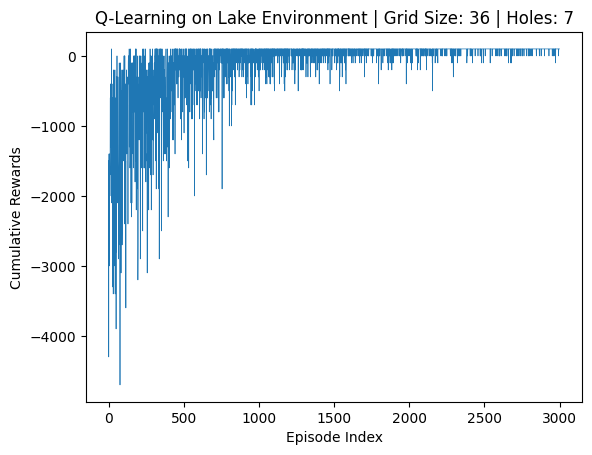

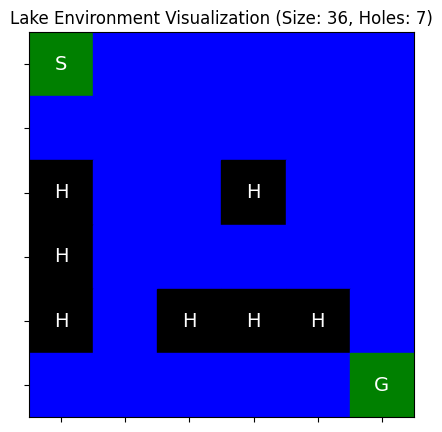

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice as random_choice
from numpy.random import uniform as random_uniform
import os

# Define alternative action labels
MOVES = ['Up', 'Right', 'Down', 'Left']

# Class definition for the LakeEnvironment
class LakeEnvironment:
    def __init__(self, grid_size, hole_count):
        self.size = int(np.sqrt(grid_size))
        self.grid = np.ones((self.size, self.size))
        self.reward_structure = self.setup_reward_matrix()
        self.reward_structure = self.add_random_holes(hole_count)
        self.starting_position = (0, 0)
        self.current_position = self.starting_position
        self.finished = False

    def setup_reward_matrix(self):
        reward_matrix = np.zeros((self.size, self.size))
        reward_matrix[-1, -1] = 100  # Define goal position
        return reward_matrix

    def add_random_holes(self, hole_count):
        reward_matrix = self.reward_structure.copy()
        hole_indices = random_choice(range(1, self.size * self.size - 1), hole_count, replace=False)

        for idx in hole_indices:
            x, y = divmod(idx, self.size)
            reward_matrix[x][y] = -100  # Assign penalty for holes

        return reward_matrix

    def reset_environment(self):
        self.current_position = self.starting_position
        self.finished = False
        return 0

    def execute_action(self, action):
        x, y = self.current_position
        if action == 0:  # Up
            x = max(x - 1, 0)
        elif action == 1:  # Right
            y = min(y + 1, self.size - 1)
        elif action == 2:  # Down
            x = min(x + 1, self.size - 1)
        elif action == 3:  # Left
            y = max(y - 1, 0)

        self.current_position = (x, y)
        state = self.size * x + y
        reward = self.reward_structure[x][y]

        if state == (self.size * self.size - 1):
            self.finished = True

        return state, reward, self.finished

    def choose_random_move(self):
        return random_choice(len(MOVES))

# Parameters for the environment
GRID_SIZE = 36  # Size of the grid (6x6)
NUMBER_OF_HOLES = 7  # Number of holes
lake_env = LakeEnvironment(GRID_SIZE, NUMBER_OF_HOLES)

# Initialize Q-table
Q_table = np.zeros((GRID_SIZE, 4))

# Handle Q-values for boundary conditions
for i in range(lake_env.size):
    Q_table[i * lake_env.size][3] = -1e8  # Block left action
    Q_table[i * lake_env.size + (lake_env.size - 1)][1] = -1e8  # Block right action

# Q-learning settings
total_episodes = 3000
learning_rate = 0.8
discount_factor = 0.8
max_steps = lake_env.size * lake_env.size * 3
reward_history = []

# Q-learning algorithm
for episode in range(total_episodes):
    current_state = lake_env.reset_environment()
    total_reward = 0

    for step in range(max_steps):
        exploration_chance = random_uniform(0, 1)
        if exploration_chance > np.exp(-episode * 5e-4):
            action = np.argmax(Q_table[current_state, :])
        else:
            action = lake_env.choose_random_move()

        new_state, reward, done = lake_env.execute_action(action)

        # Update Q-values
        Q_table[current_state, action] += learning_rate * (reward + discount_factor * np.max(Q_table[new_state, :]) - Q_table[current_state, action])
        total_reward += reward
        current_state = new_state

        if done:
            break

    reward_history.append(total_reward)

# Visualize rewards over episodes
plt.plot(reward_history, linewidth=0.5)
plt.ylabel('Cumulative Rewards')
plt.xlabel('Episode Index')
plt.title(f'Q-Learning on Lake Environment | Grid Size: {GRID_SIZE} | Holes: {NUMBER_OF_HOLES}')

# Directory for saving output
output_directory = 'output_results'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the rewards plot
plt.savefig(f'{output_directory}/{GRID_SIZE}_{NUMBER_OF_HOLES}_qlearning_results.png', dpi=200)
plt.show()

# Function to visualize the Lake Environment
def visualize_lake(env):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(np.ones_like(env.grid), cmap='Blues', interpolation='none')

    ax.set_xticks(np.arange(env.size))
    ax.set_yticks(np.arange(env.size))
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    for i in range(env.size):
        for j in range(env.size):
            if (i, j) == env.starting_position:  # Starting point
                ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, color='green'))
                ax.text(j, i, 'S', ha='center', va='center', color='white', fontsize=14)
            elif (i, j) == (env.size - 1, env.size - 1):  # Goal point
                ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, color='green'))
                ax.text(j, i, 'G', ha='center', va='center', color='white', fontsize=14)
            elif env.reward_structure[i, j] == -100:  # Holes
                ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, color='black'))
                ax.text(j, i, 'H', ha='center', va='center', color='white', fontsize=14)
            else:
                ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, color='blue'))

    plt.title(f'Lake Environment Visualization (Size: {GRID_SIZE}, Holes: {NUMBER_OF_HOLES})')
    plt.show()

# Call the visualization function
visualize_lake(lake_env)


## Part (c): Investigating the Effect of Learning Parameters (Alpha and Gamma)
To understand how the learning rate (α) and discount factor (γ) affect the performance of the Q-learning algorithm, we experiment with different values for these parameters.

We test the performance by running the Q-learning algorithm with combinations of α and γ, and plot the learning curve for each.


### Answer to Part (c)

**Impact of α (Alpha) and λ (Lambda) on Learning Performance:**




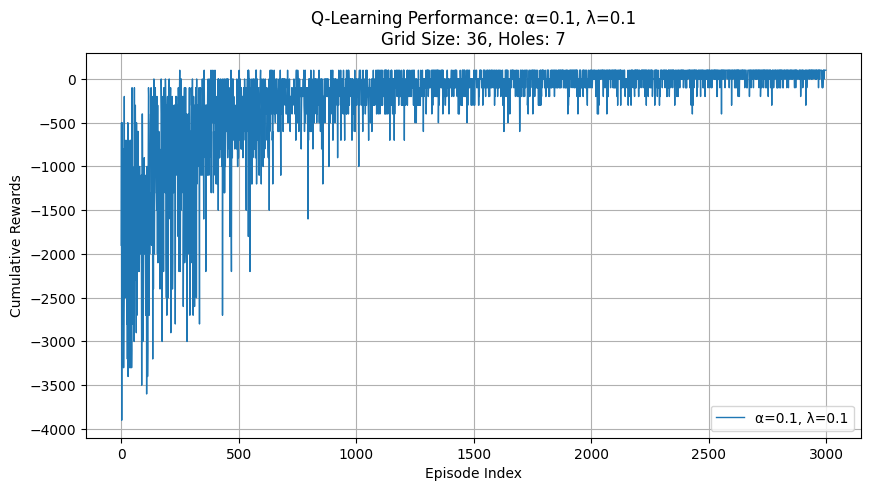

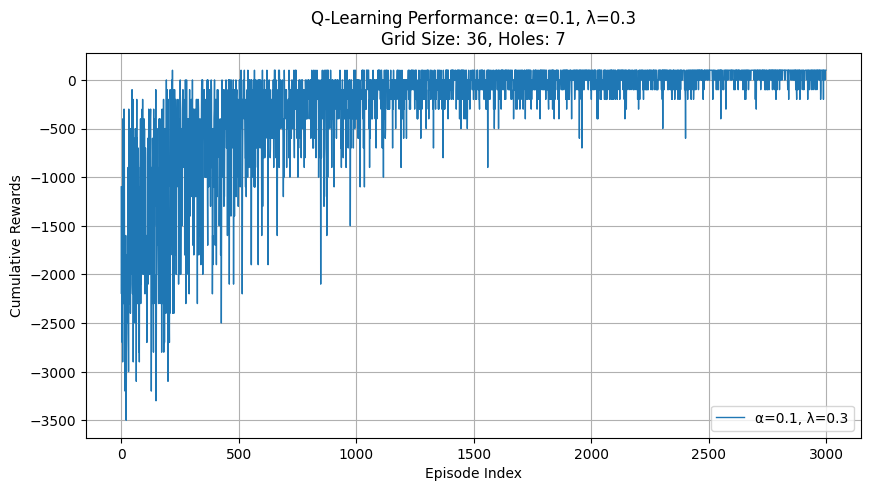

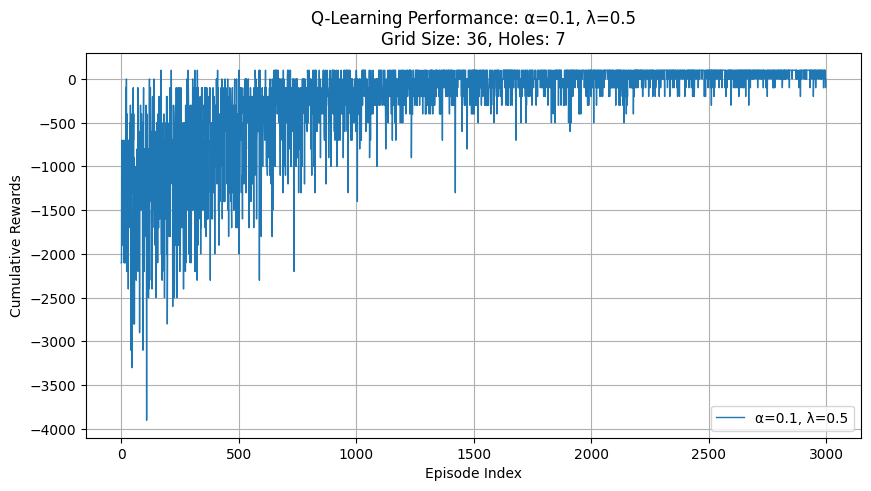

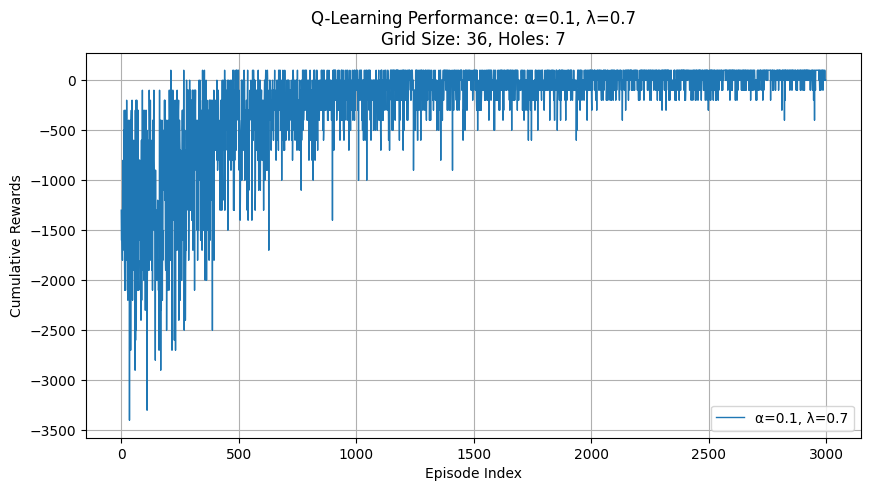

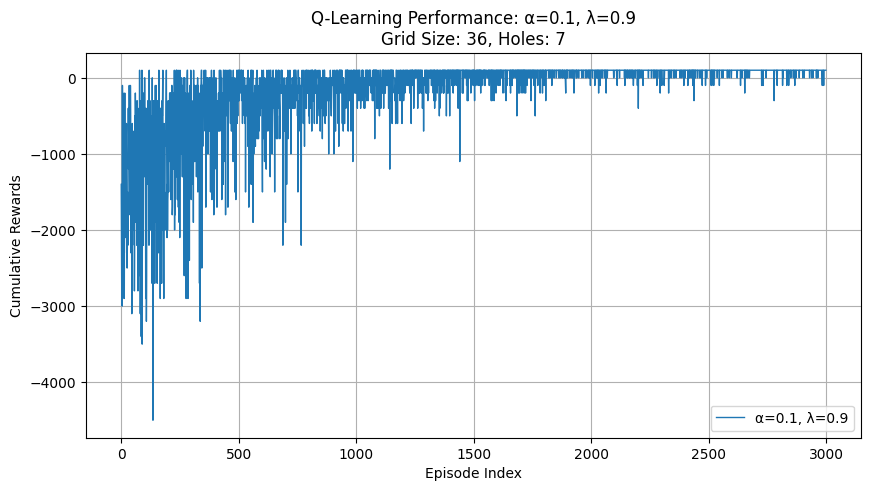

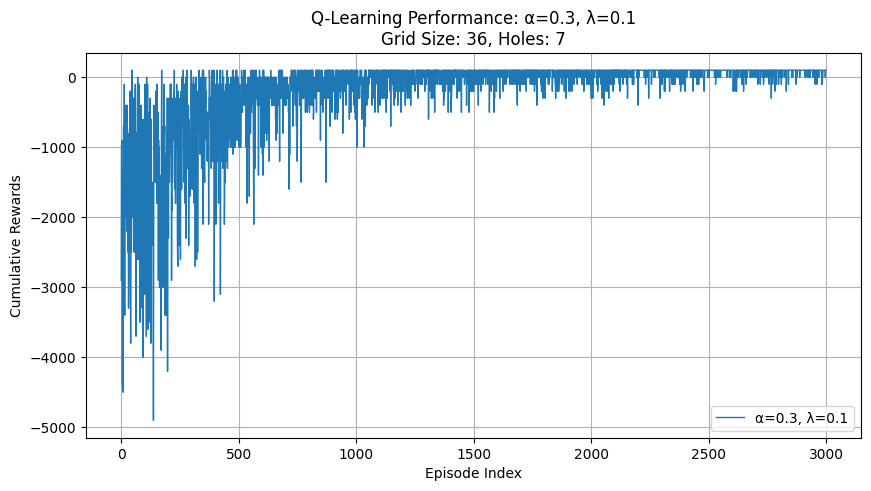

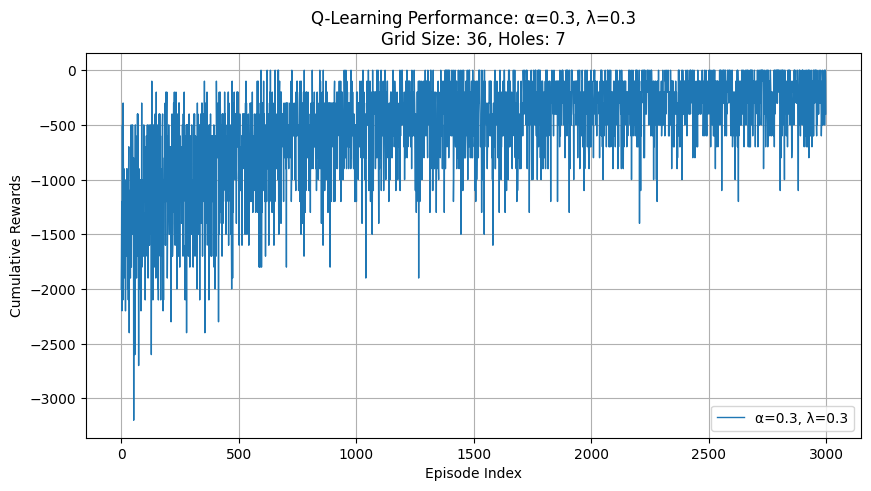

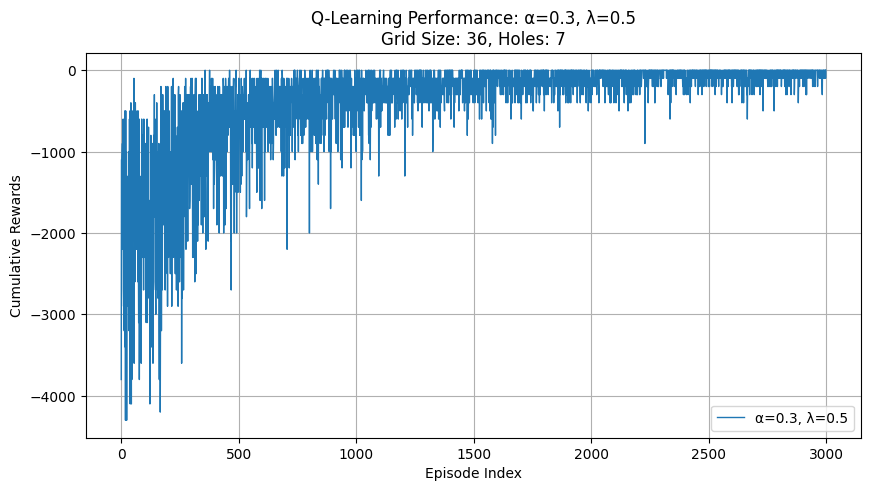

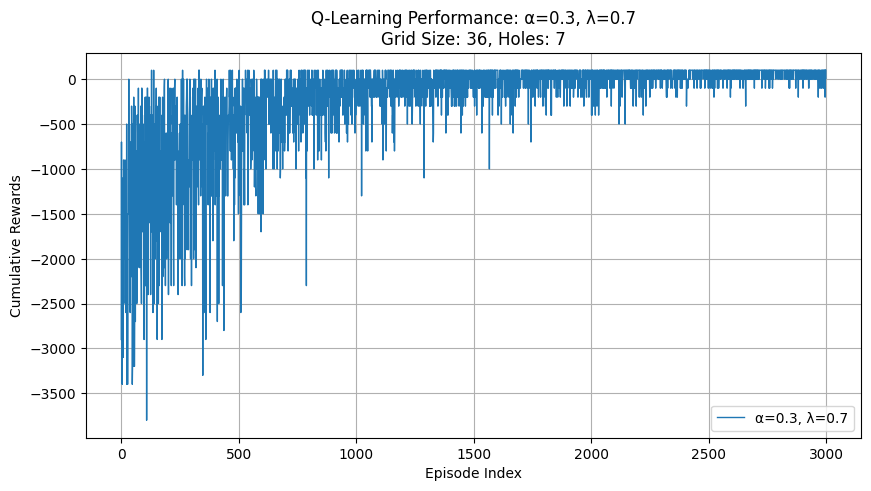

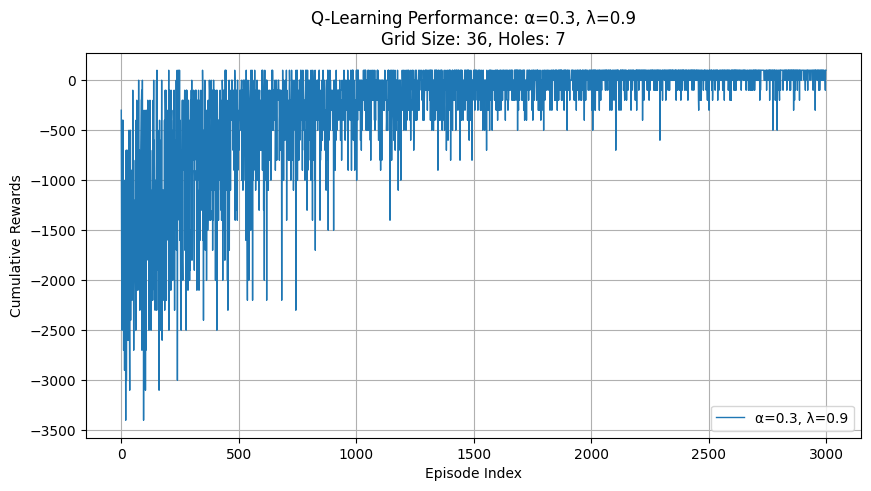

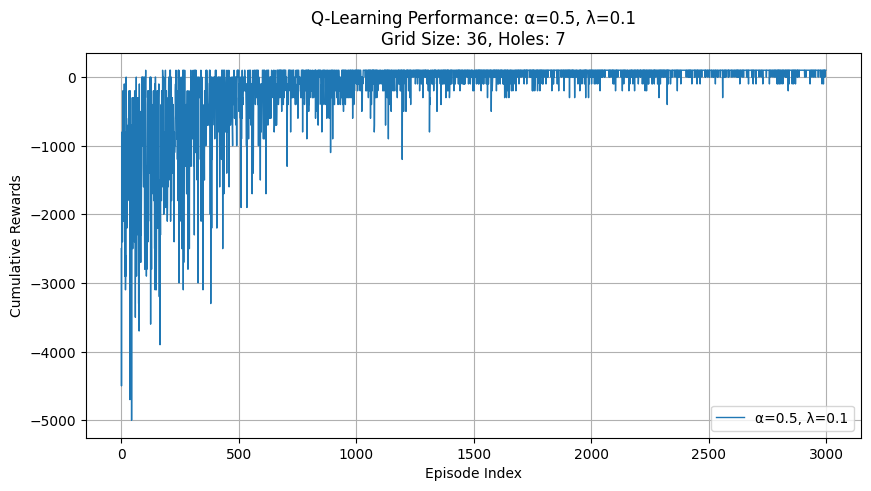

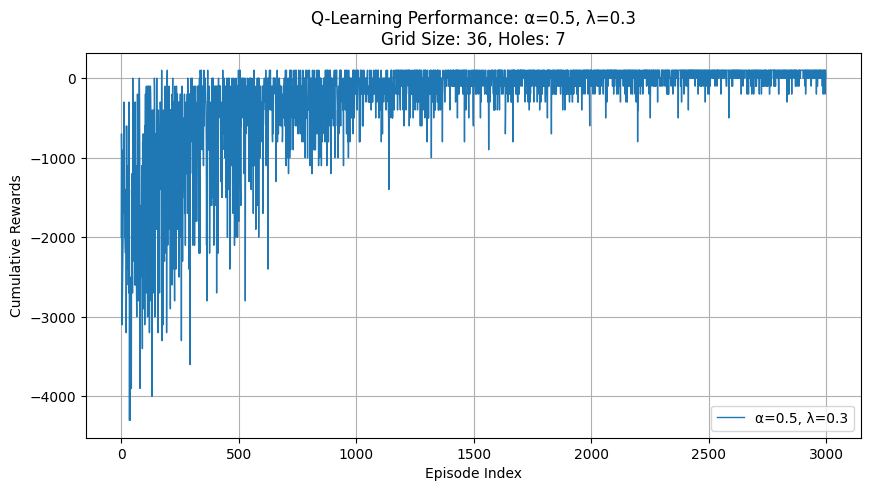

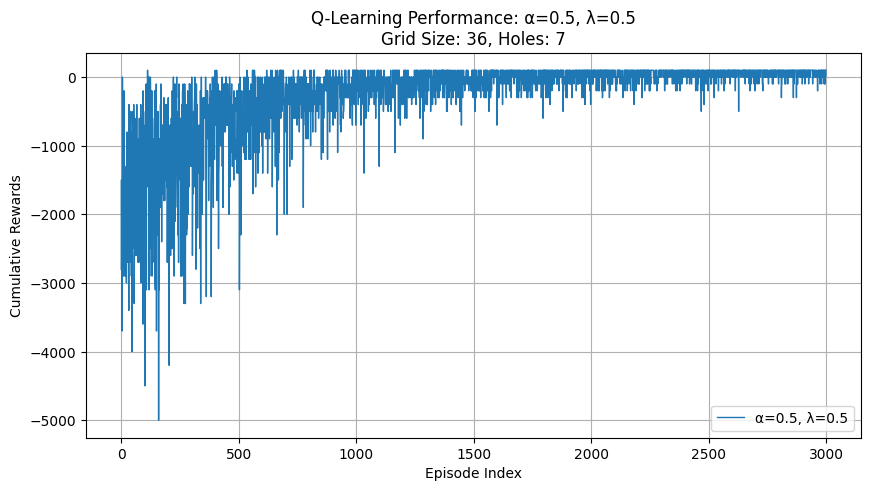

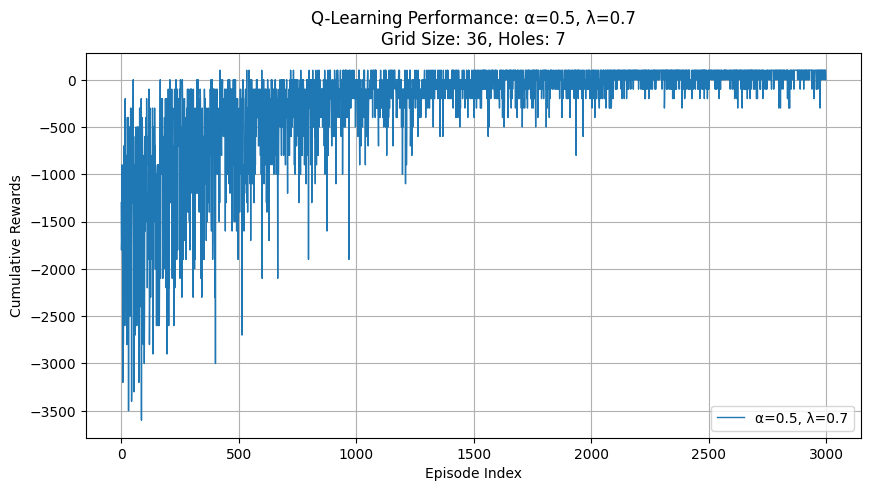

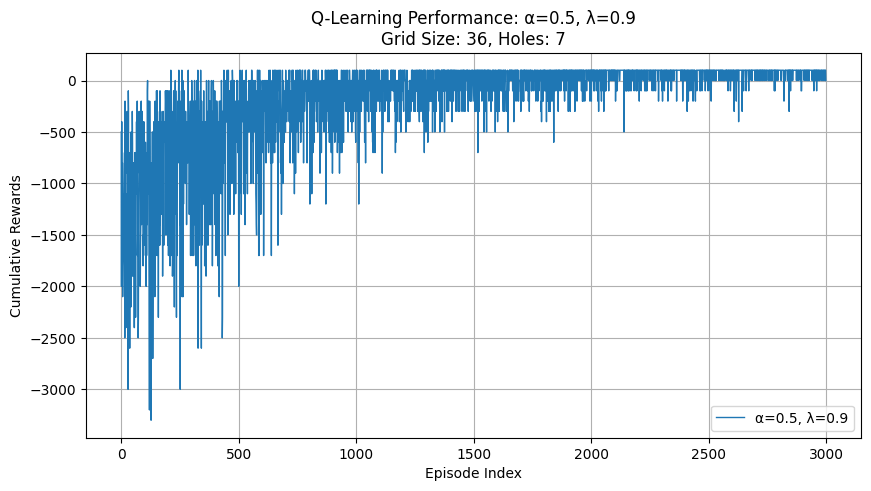

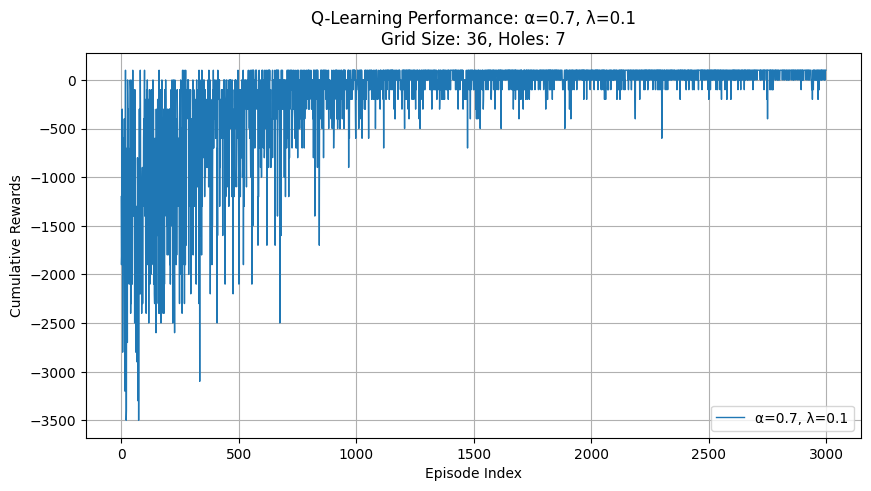

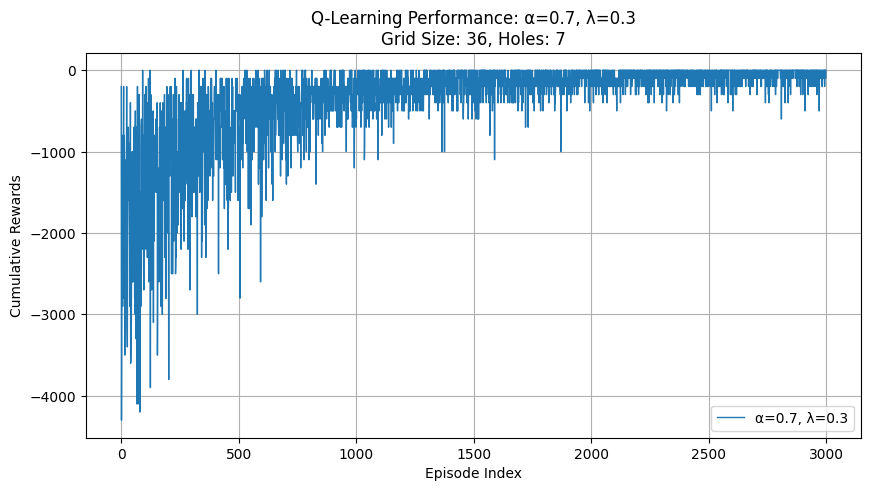

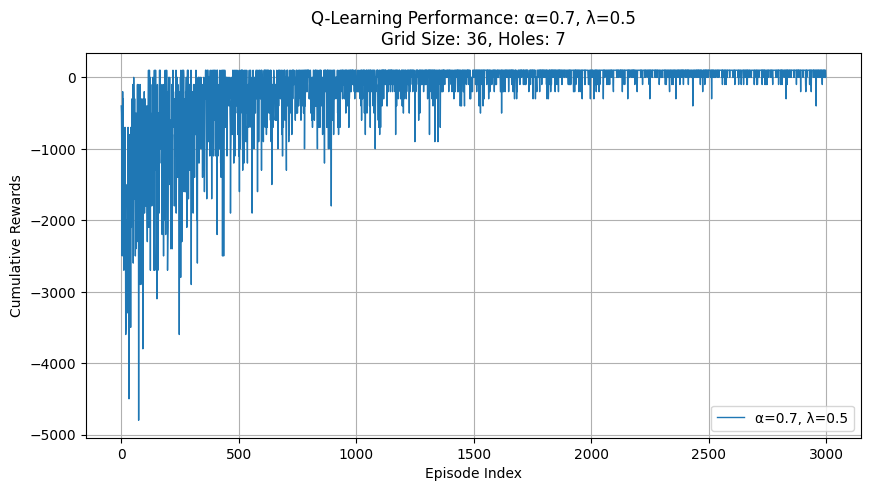

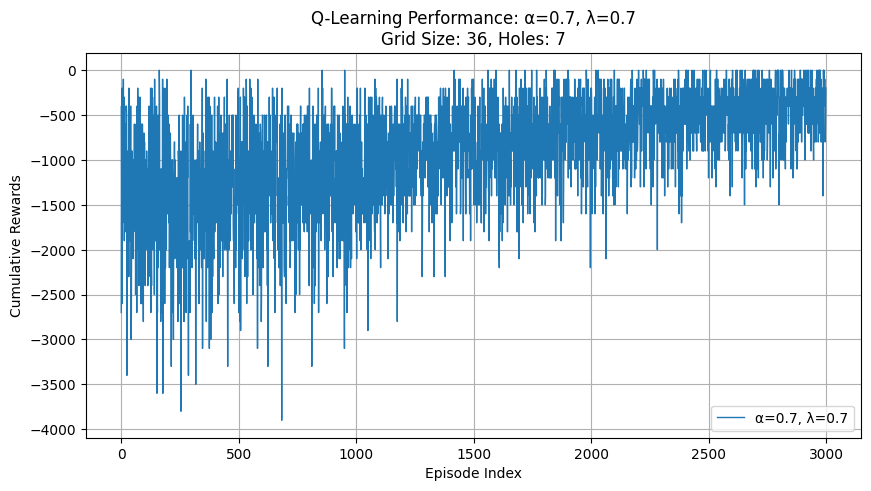

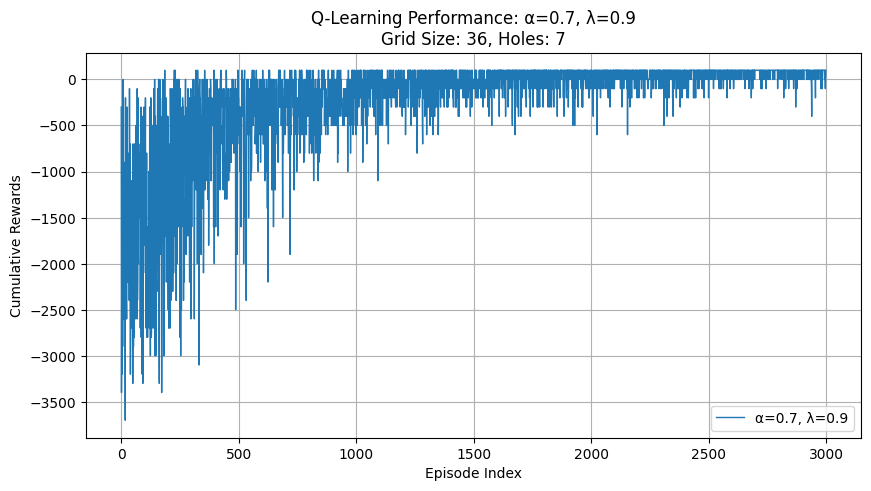

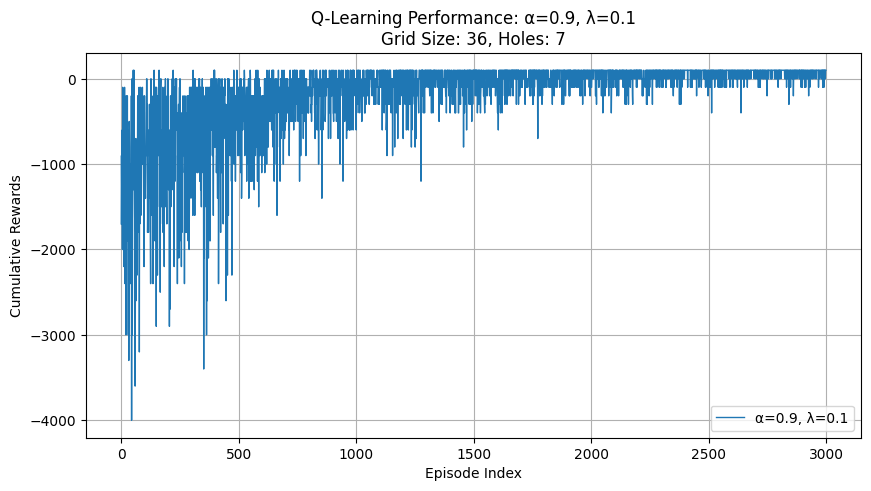

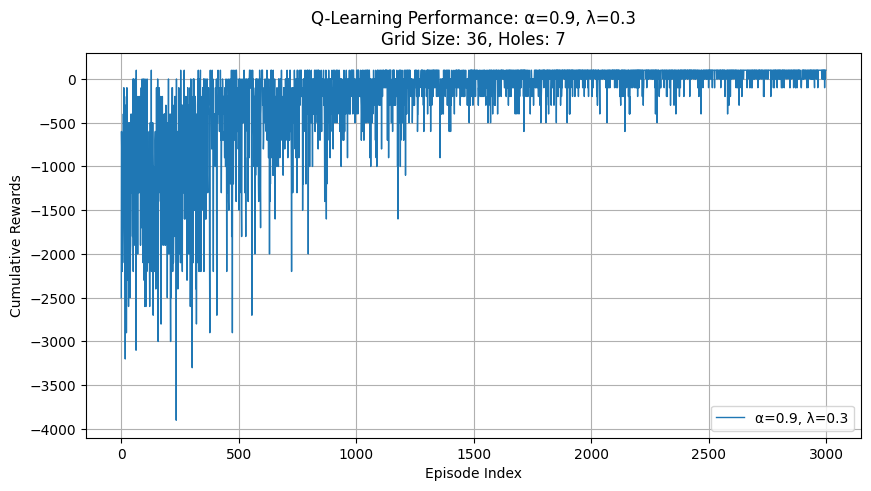

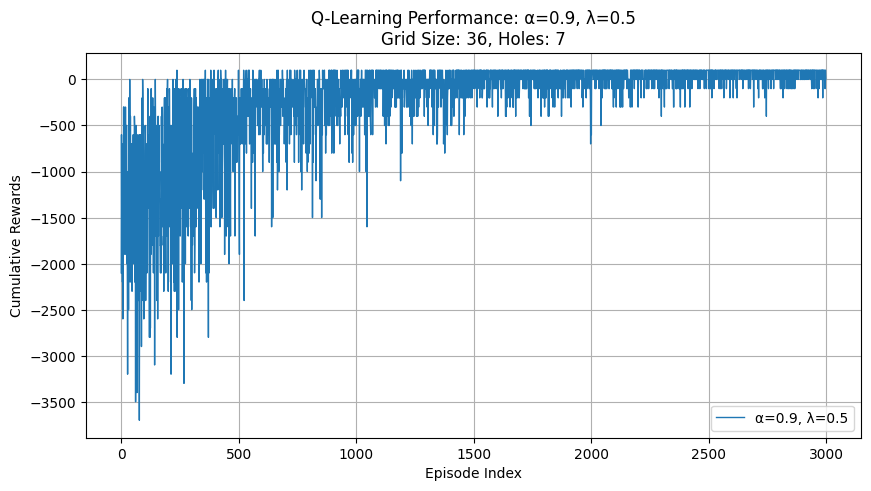

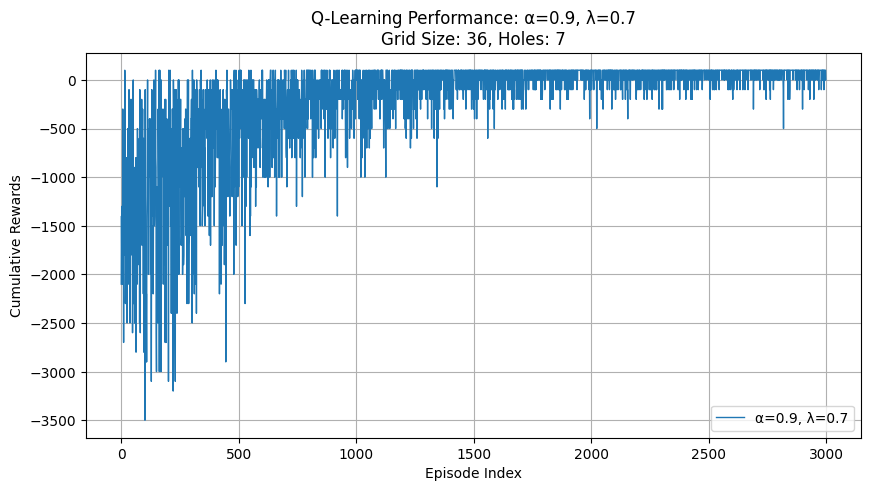

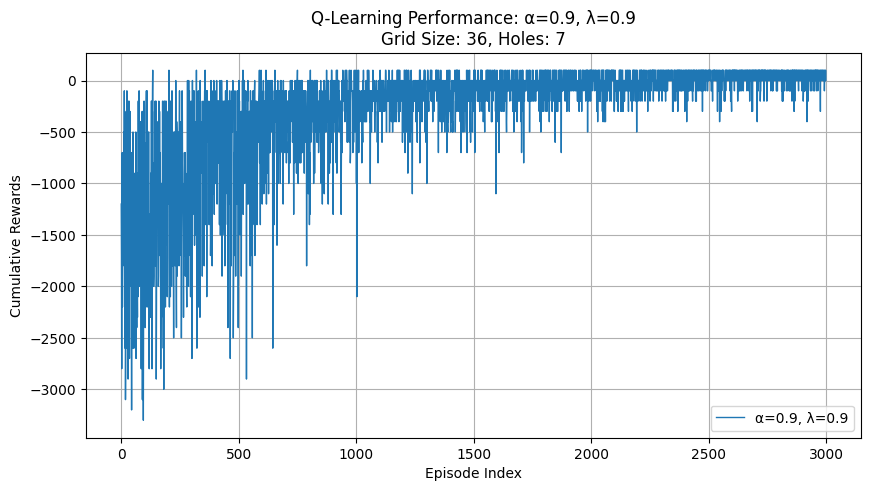

In [127]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice as random_choice
from numpy.random import uniform as random_uniform
import os

# Define alternative action labels
MOVES = ['Up', 'Right', 'Down', 'Left']

# Class definition for the LakeEnvironment
class LakeEnvironment:
    def __init__(self, grid_size, hole_count):
        self.size = int(np.sqrt(grid_size))
        self.grid = np.ones((self.size, self.size))
        self.reward_structure = self.setup_reward_matrix()
        self.reward_structure = self.add_random_holes(hole_count)
        self.starting_position = (0, 0)
        self.current_position = self.starting_position
        self.finished = False

    def setup_reward_matrix(self):
        reward_matrix = np.zeros((self.size, self.size))
        reward_matrix[-1, -1] = 100  # Define goal position
        return reward_matrix

    def add_random_holes(self, hole_count):
        reward_matrix = self.reward_structure.copy()
        hole_indices = random_choice(range(1, self.size * self.size - 1), hole_count, replace=False)

        for idx in hole_indices:
            x, y = divmod(idx, self.size)
            reward_matrix[x][y] = -100  # Assign penalty for holes

        return reward_matrix

    def reset_environment(self):
        self.current_position = self.starting_position
        self.finished = False
        return 0

    def execute_action(self, action):
        x, y = self.current_position
        if action == 0:  # Up
            x = max(x - 1, 0)
        elif action == 1:  # Right
            y = min(y + 1, self.size - 1)
        elif action == 2:  # Down
            x = min(x + 1, self.size - 1)
        elif action == 3:  # Left
            y = max(y - 1, 0)

        self.current_position = (x, y)
        state = self.size * x + y
        reward = self.reward_structure[x][y]

        if state == (self.size * self.size - 1):
            self.finished = True

        return state, reward, self.finished

    def choose_random_move(self):
        return random_choice(len(MOVES))

# Parameters for the environment
GRID_SIZE = 36  # Size of the grid (6x6)
NUMBER_OF_HOLES = 7  # Number of holes
total_episodes = 3000
max_steps = GRID_SIZE * 3

# Learning rates and discount factors to test
learning_rates = [0.1, 0.3, 0.5, 0.7, 0.9]
discount_factors = [0.1, 0.3, 0.5, 0.7, 0.9]

# Create a directory for saving output plots
output_directory = 'output_results'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Q-learning algorithm for different learning rates and discount factors
for lr in learning_rates:
    for gamma in discount_factors:
        lake_env = LakeEnvironment(GRID_SIZE, NUMBER_OF_HOLES)
        Q_table = np.zeros((GRID_SIZE, 4))  # Initialize Q-table
        reward_history = []

        for episode in range(total_episodes):
            current_state = lake_env.reset_environment()
            total_reward = 0

            for step in range(max_steps):
                exploration_chance = random_uniform(0, 1)
                if exploration_chance > np.exp(-episode * 5e-4):
                    action = np.argmax(Q_table[current_state, :])
                else:
                    action = lake_env.choose_random_move()

                new_state, reward, done = lake_env.execute_action(action)

                # Update Q-values
                Q_table[current_state, action] += lr * (reward + gamma * np.max(Q_table[new_state, :]) - Q_table[current_state, action])
                total_reward += reward
                current_state = new_state

                if done:
                    break

            reward_history.append(total_reward)

        # Plotting the results for each learning rate and discount factor combination
        plt.figure(figsize=(10, 5))
        plt.plot(reward_history, label=f'α={lr}, λ={gamma}', linewidth=1)
        plt.ylabel('Cumulative Rewards')
        plt.xlabel('Episode Index')
        plt.title(f'Q-Learning Performance: α={lr}, λ={gamma}\nGrid Size: {GRID_SIZE}, Holes: {NUMBER_OF_HOLES}')
        plt.legend()
        plt.grid()

        # Save each plot
        plt.savefig(f'{output_directory}/qlearning_alpha_{lr}_gamma_{gamma}.png', dpi=200)
        plt.show()


## Conclusion

Varying the learning rate (α) and discount factor (λ) highly impacts the Q-learning agent's performance for finding path in the lake environment. Higher α values give quicker adaptation, while higher λ values promote long-term reward consideration. The resulting plots show how these parameters affect rewards over episodes, highlighting the importance of good parameters for optimal learning.


## Part (d): Effect of Lake Size (N) and Number of Holes (M)
We now will see how the size of the lake (N) and the number of holes (M) impact the performance of the Q-learning algorithm. Larger lakes or more holes increase the complexity of the environment, making it harder for the agent to reach the goal.

We test the algorithm for varying lake sizes and numbers of holes and plot the learning curves for each combination.

To improve execution time, we reduce the number of episodes and make sure the Q-learning agent efficiently utilizes the environment.



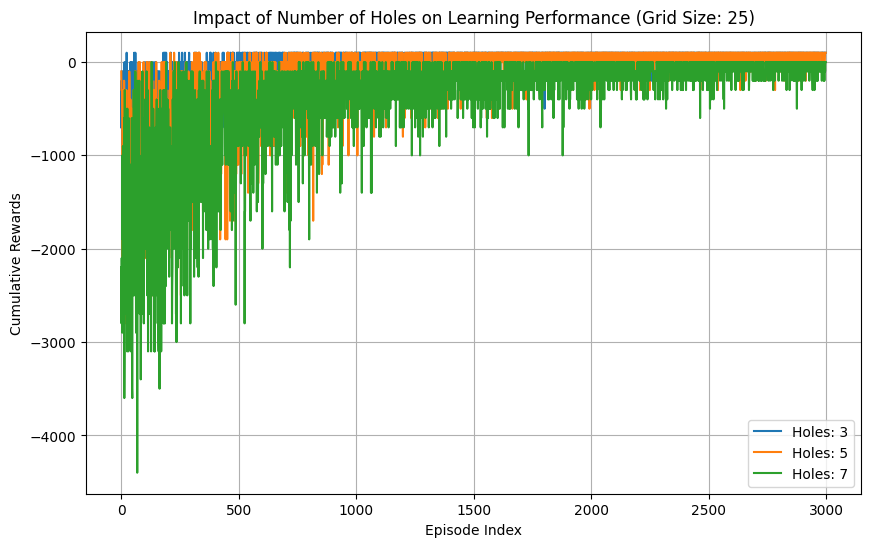

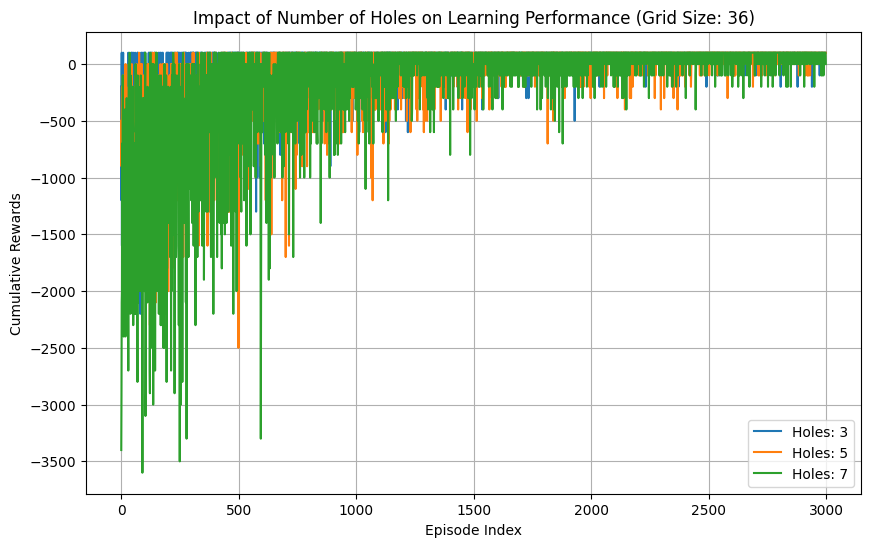

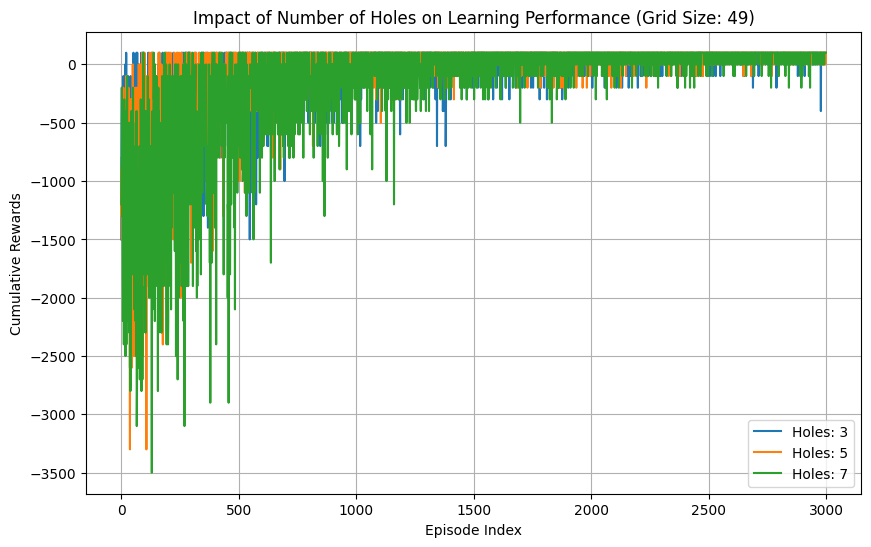

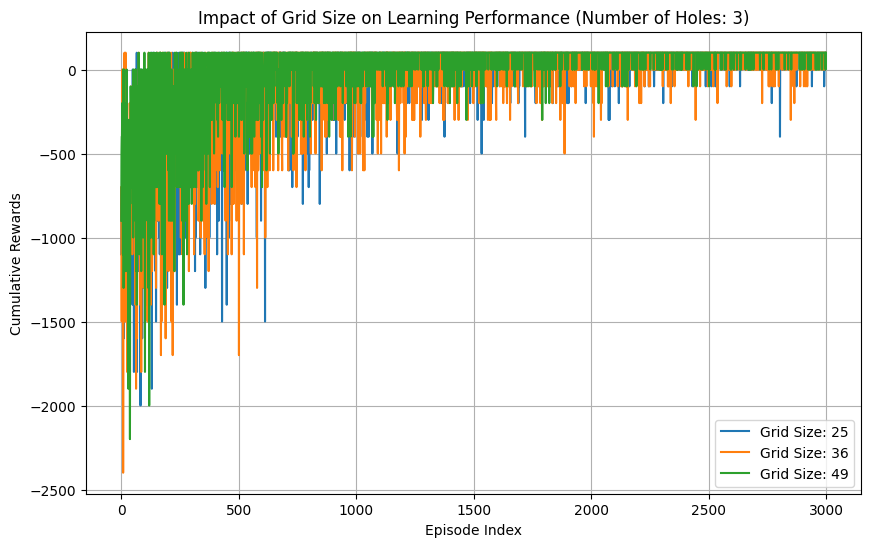

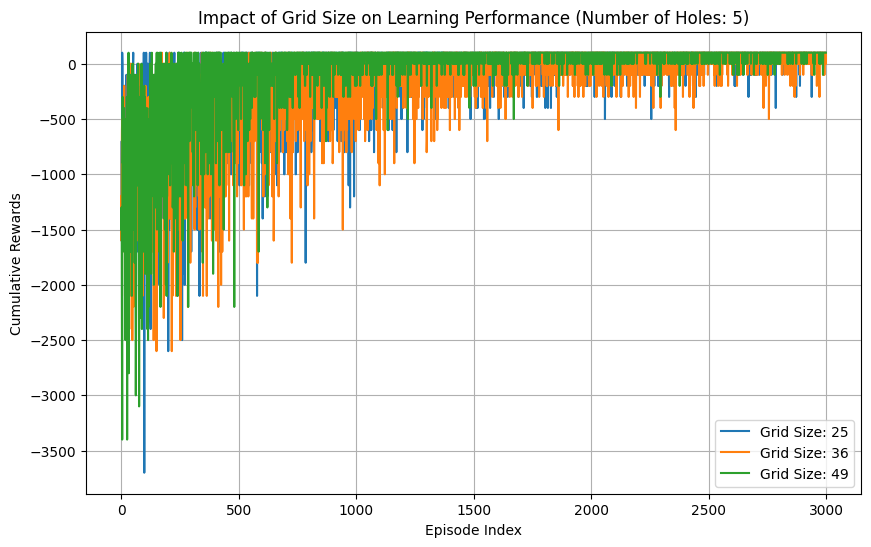

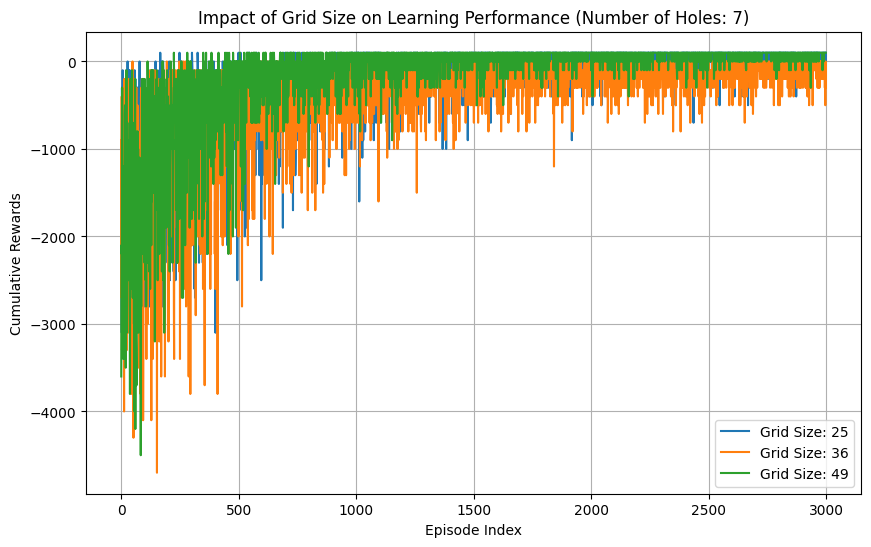

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice as random_choice
from numpy.random import uniform as random_uniform

# Class definition for the LakeEnvironment
class LakeEnvironment:
    def __init__(self, grid_size, hole_count):
        self.size = int(np.sqrt(grid_size))
        self.grid = np.ones((self.size, self.size))
        self.reward_structure = self.setup_reward_matrix()
        self.reward_structure = self.add_random_holes(hole_count)
        self.starting_position = (0, 0)
        self.current_position = self.starting_position
        self.finished = False

    def setup_reward_matrix(self):
        reward_matrix = np.zeros((self.size, self.size))
        reward_matrix[-1, -1] = 100  # Define goal position
        return reward_matrix

    def add_random_holes(self, hole_count):
        reward_matrix = self.reward_structure.copy()
        hole_indices = random_choice(range(1, self.size * self.size - 1), hole_count, replace=False)

        for idx in hole_indices:
            x, y = divmod(idx, self.size)
            reward_matrix[x][y] = -100  # Assign penalty for holes

        return reward_matrix

    def reset_environment(self):
        self.current_position = self.starting_position
        self.finished = False
        return 0

    def execute_action(self, action):
        x, y = self.current_position
        if action == 0:  # Up
            x = max(x - 1, 0)
        elif action == 1:  # Right
            y = min(y + 1, self.size - 1)
        elif action == 2:  # Down
            x = min(x + 1, self.size - 1)
        elif action == 3:  # Left
            y = max(y - 1, 0)

        self.current_position = (x, y)
        state = self.size * x + y
        reward = self.reward_structure[x][y]

        if state == (self.size * self.size - 1):
            self.finished = True

        return state, reward, self.finished

    def choose_random_move(self):
        return random_choice(len(MOVES))

# Function to run Q-learning and return cumulative rewards
def run_q_learning(grid_size, number_of_holes, total_episodes=3000, learning_rate=0.8, discount_factor=0.8):
    lake_env = LakeEnvironment(grid_size, number_of_holes)

    # Initialize Q-table
    Q_table = np.zeros((grid_size, 4))

    # Handle Q-values for boundary conditions
    for i in range(lake_env.size):
        Q_table[i * lake_env.size][3] = -1e8  # Block left action
        Q_table[i * lake_env.size + (lake_env.size - 1)][1] = -1e8  # Block right action

    # Q-learning algorithm
    total_reward_history = []

    for episode in range(total_episodes):
        current_state = lake_env.reset_environment()
        total_reward = 0

        for step in range(lake_env.size * lake_env.size * 3):
            exploration_chance = random_uniform(0, 1)
            if exploration_chance > np.exp(-episode * 5e-4):
                action = np.argmax(Q_table[current_state, :])
            else:
                action = lake_env.choose_random_move()

            new_state, reward, done = lake_env.execute_action(action)

            # Update Q-values
            Q_table[current_state, action] += learning_rate * (reward + discount_factor * np.max(Q_table[new_state, :]) - Q_table[current_state, action])
            total_reward += reward
            current_state = new_state

            if done:
                break

        total_reward_history.append(total_reward)

    return total_reward_history

# Parameters for plotting
grid_sizes = [25, 36, 49]  # M values (5x5, 6x6, 7x7)
number_of_holes_list = [3, 5, 7]  # N values (different number of holes)

# Plotting the results for different grid sizes
for grid_size in grid_sizes:
    plt.figure(figsize=(10, 6))
    for num_holes in number_of_holes_list:
        rewards = run_q_learning(grid_size, num_holes)
        plt.plot(rewards, label=f'Holes: {num_holes}')

    plt.xlabel('Episode Index')
    plt.ylabel('Cumulative Rewards')
    plt.title(f'Impact of Number of Holes on Learning Performance (Grid Size: {grid_size})')
    plt.legend()
    plt.grid()
    plt.show()

# Plotting the results for different numbers of holes
for num_holes in number_of_holes_list:
    plt.figure(figsize=(10, 6))
    for grid_size in grid_sizes:
        rewards = run_q_learning(grid_size, num_holes)
        plt.plot(rewards, label=f'Grid Size: {grid_size}')

    plt.xlabel('Episode Index')
    plt.ylabel('Cumulative Rewards')
    plt.title(f'Impact of Grid Size on Learning Performance (Number of Holes: {num_holes})')
    plt.legend()
    plt.grid()
    plt.show()


### Conclusion

The learning performance of the Q-learning agent declines with an increasing number of holes (\(N\)) and larger grid sizes (\(M\)), as both factors introduce greater complexity and obstacles. Optimizing these parameters is essential for improving the agent's cumulative rewards.


## Q3. Rulkov Map Simulation of Neuronal Action Potentials

Rulkov map: It is a simple dynamical systems model that simulates neuronal action potentials.
This model combines a fast and a slow dynamical system. The equations governing the model are:

- $𝑥_{𝑛+1} = 𝑓(𝑥_𝑛, 𝑦_𝑛)$ \\
- $𝑦_{𝑛+1} = 𝑦_𝑛 − 𝜇 (𝑥_𝑛 + 1) + 𝜇𝜎$

where \( $f()$ \) is a discontinuous function defined as:

- $𝑓(𝑥, 𝑦) = 𝛼/(1 − 𝑥)+ 𝑦, 𝑥 ≤ 0 \\
 𝑓(𝑥, 𝑦) = 𝛼 + 𝑦, 0 < 𝑥 < 𝛼 + 𝑦 \\
 𝑓(𝑥, 𝑦) = −1, 𝑥 ≥ 𝛼 + 𝑦$ \\

This simulation will help us to visualize different modes of neuronal activity: bursting spikes, silence, and tonic spiking.


## Step 1: Define the Discontinuous Function

The function `discontinuous_function(x, y, alpha)` implements the piecewise function \( f(x, y) \) used in the Rulkov map.
It takes parameters \( x \), \( y \), and \( \alpha \) and returns the calculated value based on the defined conditions.


In [129]:
def discontinuous_function(x, y, alpha=4):
    """Define the discontinuous function f(x, y) for the Rulkov map."""
    if x <= 0:
        return alpha / (1 - x) + y
    elif x < alpha + y:
        return alpha + y
    else:
        return -1


## Step 2: Define the Rulkov Map Generator

The function `generate_rulkov_map` generates values for \( X \) and \( Y \) using the Rulkov map equations.
It initializes arrays for \( X \) and \( Y \) and iteratively calculates their values based on the discontinuous function and the equations provided.


In [130]:
def generate_rulkov_map(N=10**3, beta=0, sigma=1, mu=0.4, alpha=4):
    """Generates values for X and Y using the Rulkov map equations."""
    X = np.zeros(N)  # Initialize the X array
    Y = np.zeros(N)  # Initialize the Y array
    for i in range(N - 1):
        X[i + 1] = discontinuous_function(X[i], Y[i] + beta, alpha=alpha)
        Y[i + 1] = Y[i] - mu * (X[i] + 1) + mu * sigma
    return X, Y


## Step 3: Define the Plotting Function

The function `plot_neuronal_behavior` is used for plotting the neuronal activity \( X \) and recovery variable \( Y \) over time.
It takes the parameters for the simulation and generates two different plots: one for \( X \) and another for \( Y \).


In [131]:
def plot_neuronal_behavior(N, beta, sigma, mu, alpha, behavior_title):
    """Plot the neuronal activity (X) and recovery variable (Y) over time."""
    X, Y = generate_rulkov_map(N=N, beta=beta, sigma=sigma, mu=mu, alpha=alpha)
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 1, 1)
    plt.plot(X, label='X (neuronal activity)', color='blue')
    plt.title(f'{behavior_title}: Neuronal Activity')
    plt.ylabel('X')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(Y, label='Y (recovery variable)', color='orange')
    plt.title(f'{behavior_title}: Recovery Variable')
    plt.ylabel('Y')
    plt.xlabel('Time Steps')
    plt.grid()

    plt.tight_layout()
    plt.show()


## Step 4: Visualizing Bursting Spikes

We will now simulate and visualize bursting spikes by setting specific parameter values for \( β \), \( σ \), \( μ \), and \( α \).


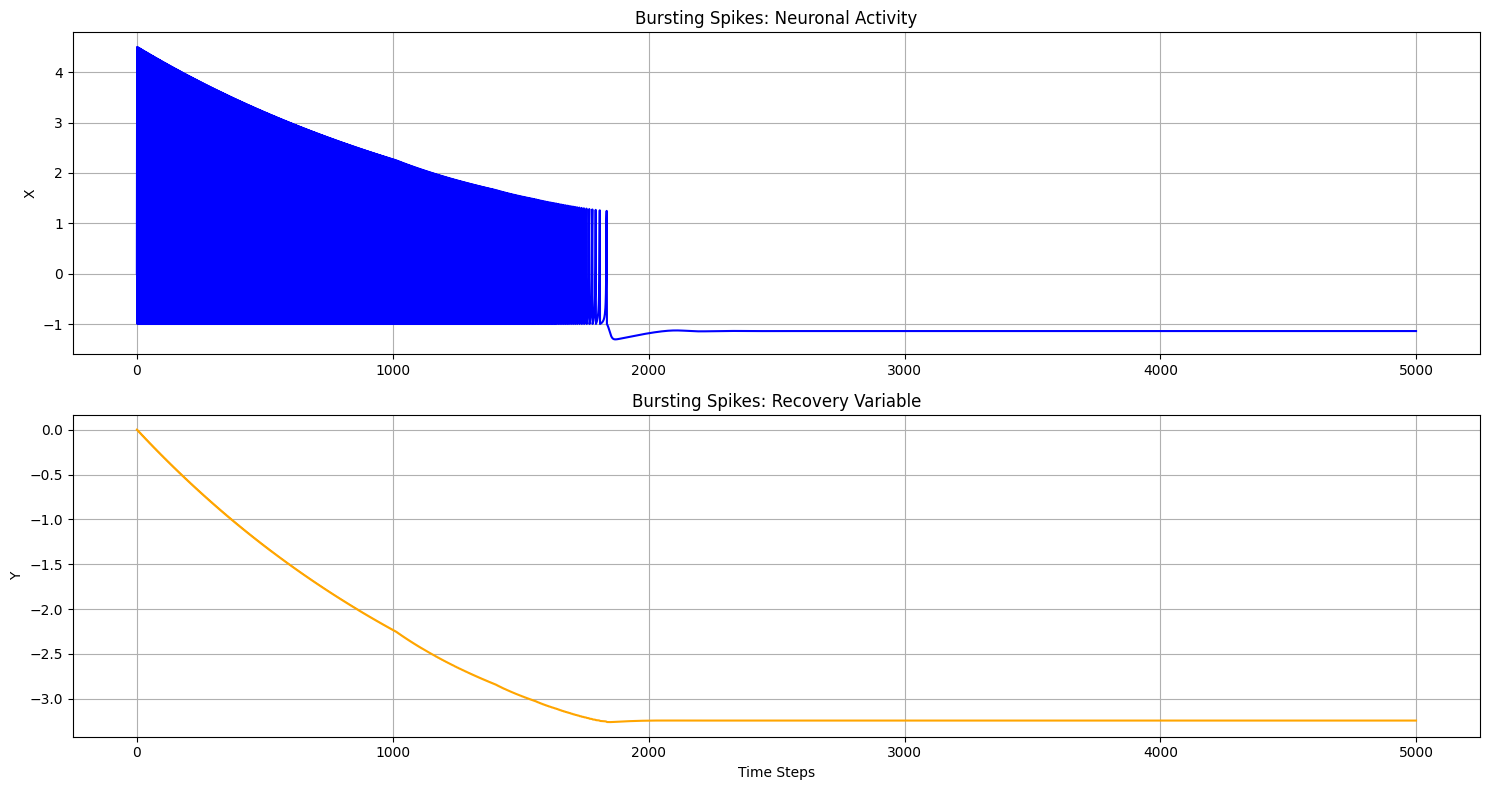

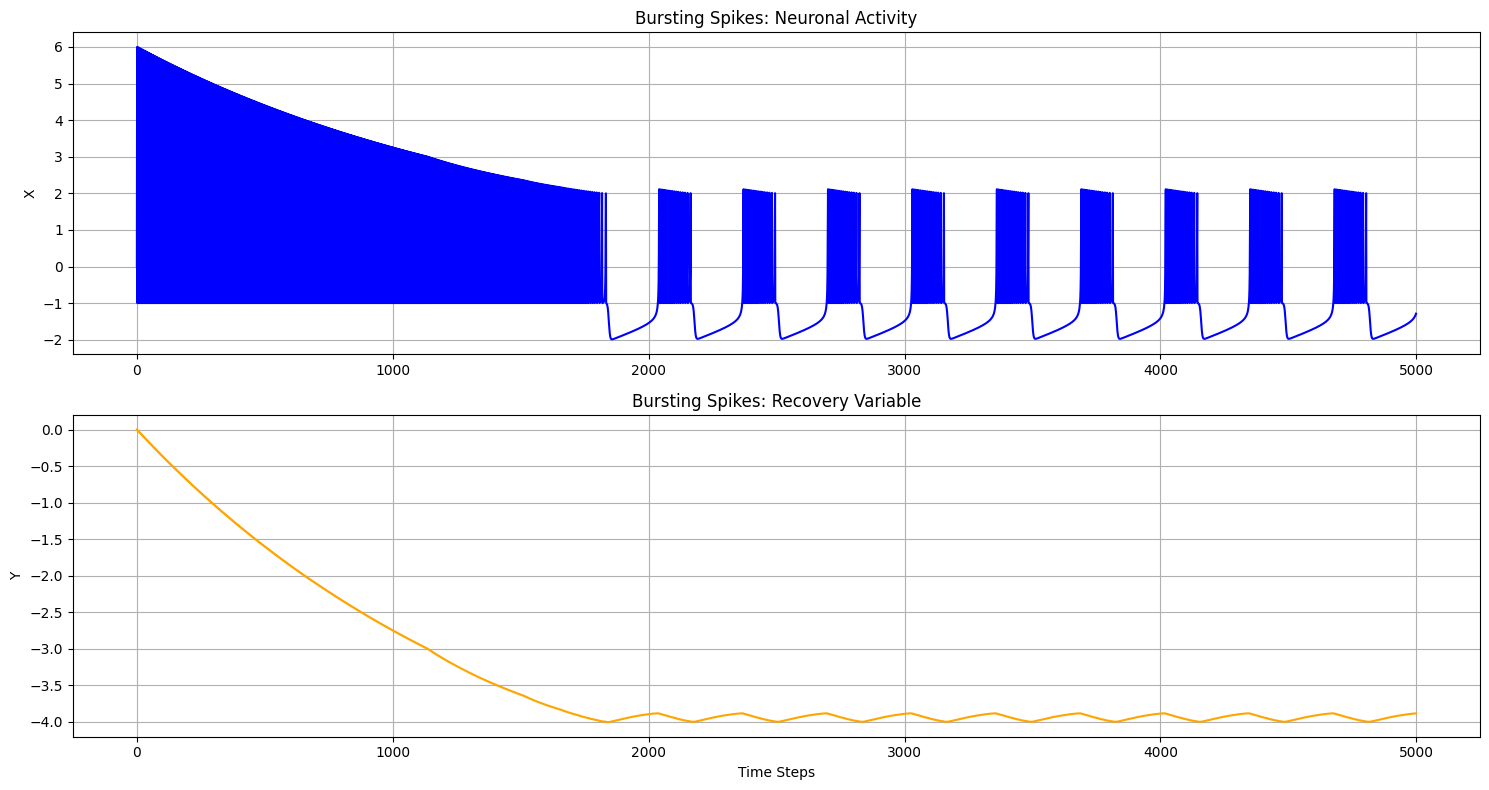

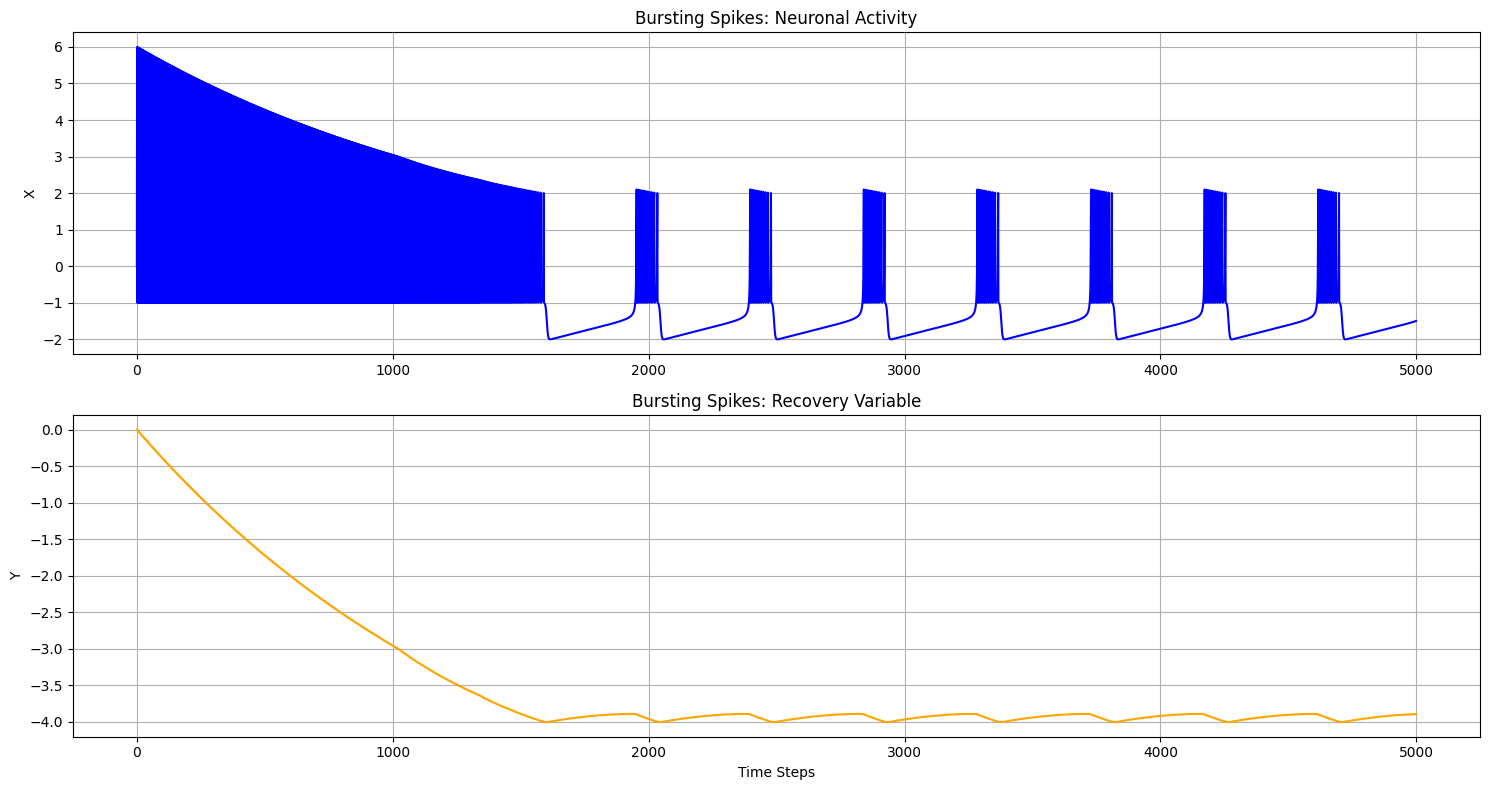

In [132]:
# Parameters for bursting spikes
N = 5 * 10**3
plot_neuronal_behavior(N, beta=0, sigma=-0.14, mu=0.001, alpha=4.5, behavior_title='Bursting Spikes')
plot_neuronal_behavior(N, beta=0, sigma=-0.1, mu=0.001, alpha=6, behavior_title='Bursting Spikes')
plot_neuronal_behavior(N, beta=0, sigma=-0.386, mu=0.001, alpha=6, behavior_title='Bursting Spikes')


## Step 5: Visualizing Silence

Now, we will try to simulate and visualize silence by changing the parameters appropriately.


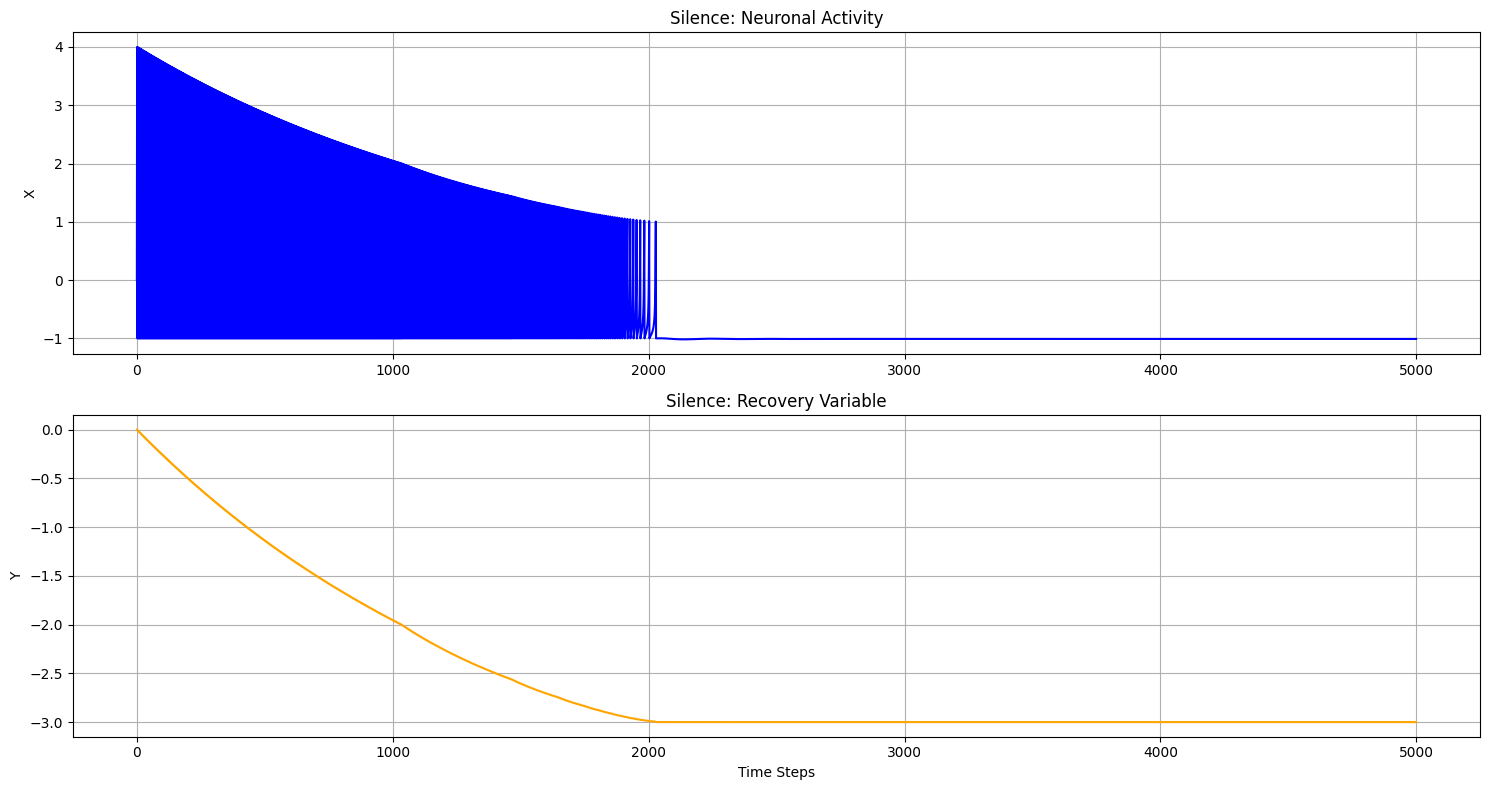

In [133]:
# Parameters for silence
plot_neuronal_behavior(N, beta=0, sigma=-0.01, mu=0.001, alpha=4, behavior_title='Silence')


## Step 6: Visualizing Tonic Spikes

Now, we will simulate and visualize tonic spiking behavior by changing the parameter values.


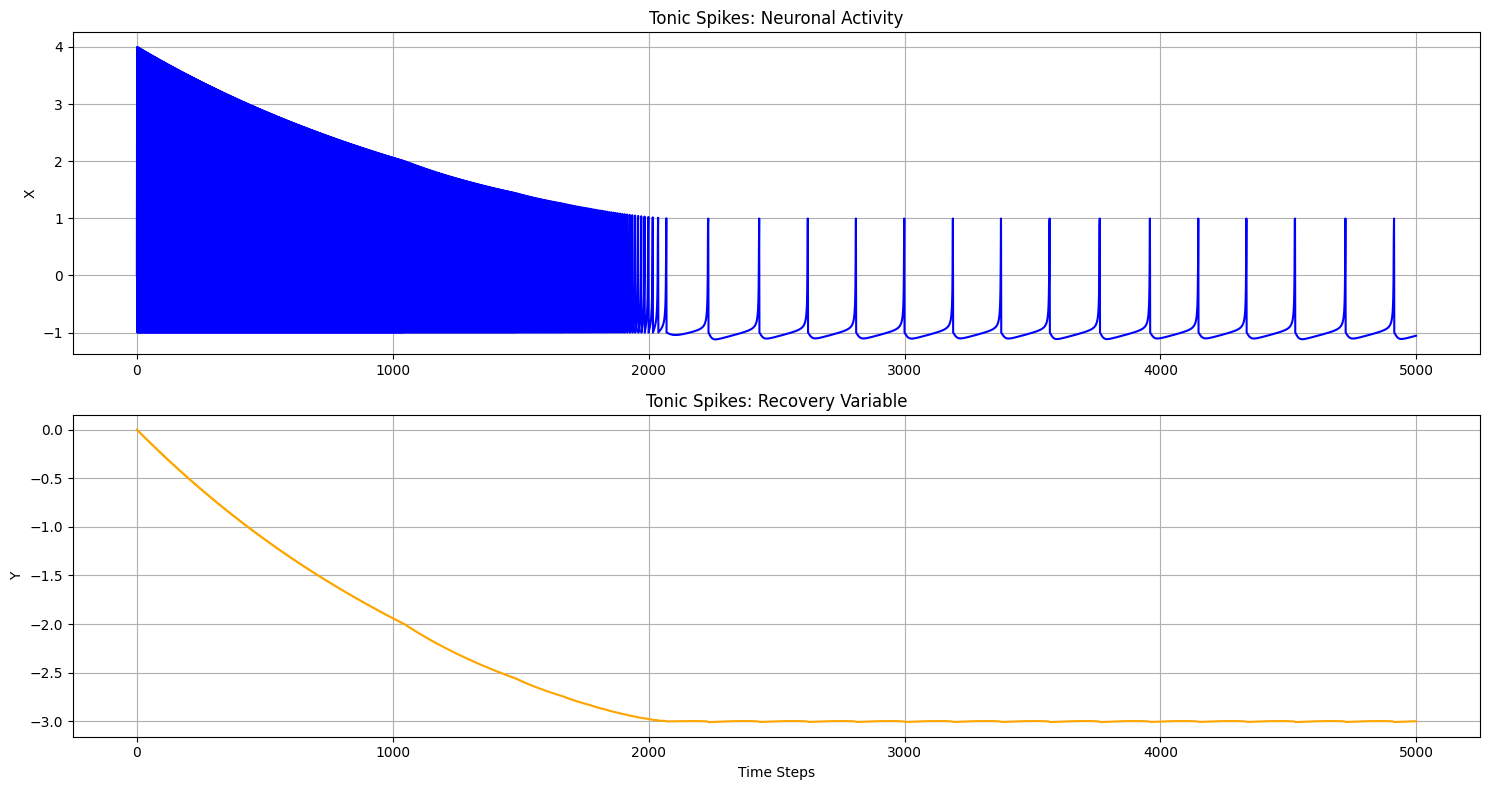

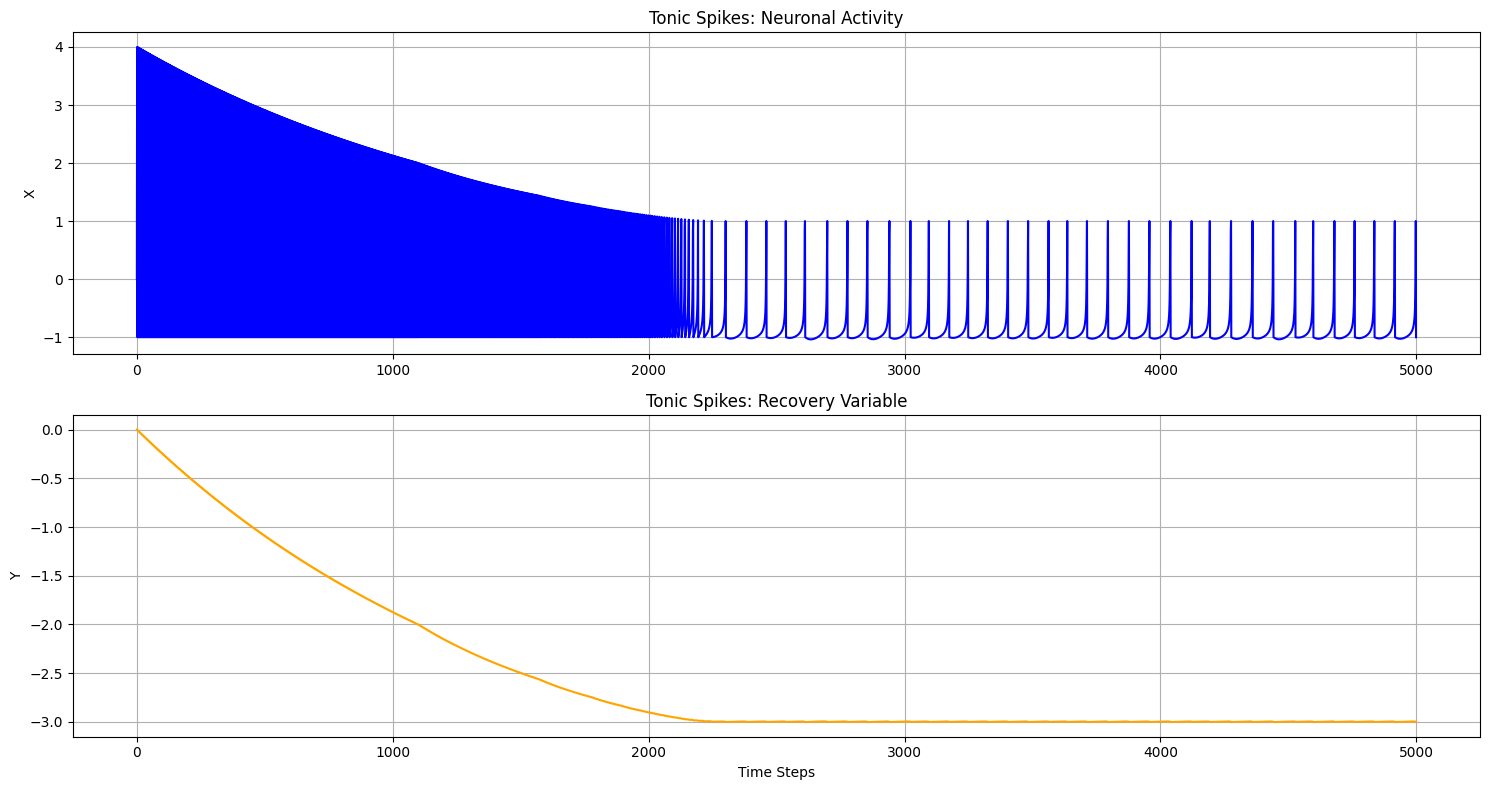

In [134]:
# Parameters for tonic spikes
plot_neuronal_behavior(N, beta=0, sigma=0.01, mu=0.001, alpha=4, behavior_title='Tonic Spikes')
plot_neuronal_behavior(N, beta=0, sigma=0.1, mu=0.001, alpha=4, behavior_title='Tonic Spikes')


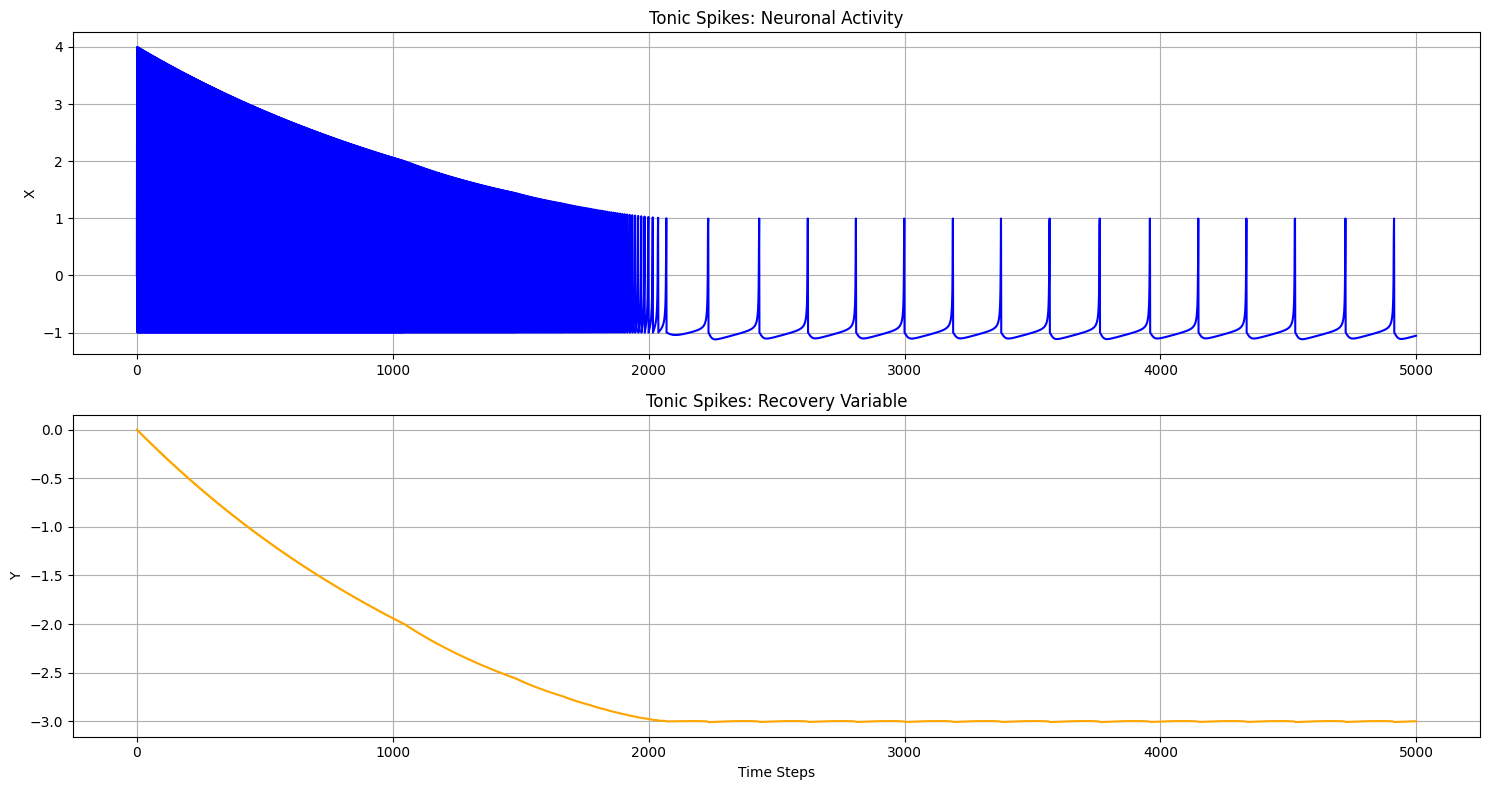

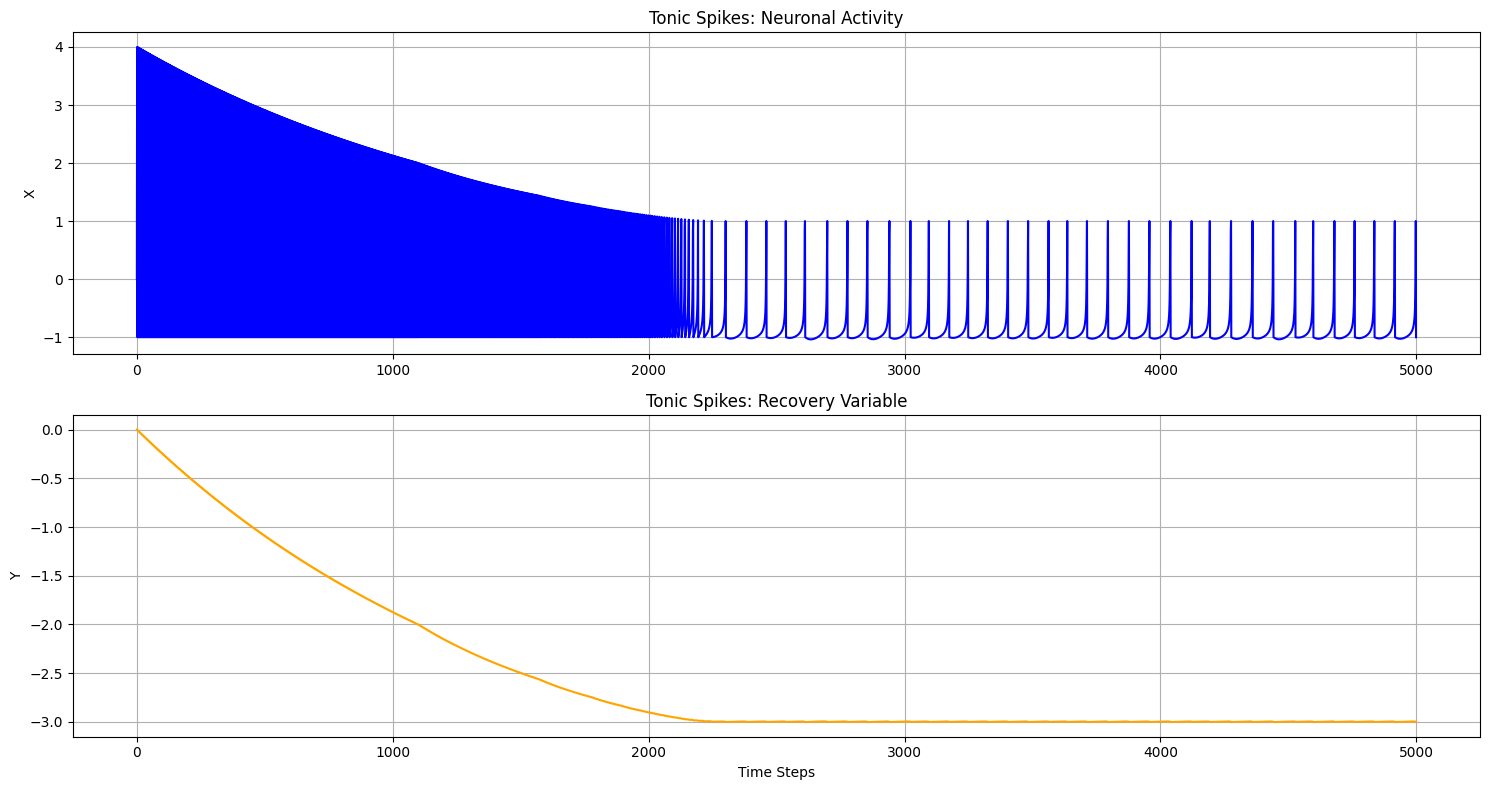

In [135]:
# Parameters for tonic spikes
plot_neuronal_behavior(N, beta=0, sigma=0.01, mu=0.001, alpha=4, behavior_title='Tonic Spikes')
plot_neuronal_behavior(N, beta=0, sigma=0.1, mu=0.001, alpha=4, behavior_title='Tonic Spikes')


### Summary of Parameter Values and Neuronal Behaviors
The following parameters were used to simulate different neuronal behaviors in the Rulkov model. Each behavior corresponds to a specific configuration of parameters.

- **Bursting Spikes:**
  - **Parameters:**
    - \( 𝛼 = 4.5 \)
    - \( 𝜇 = 0.001 \)
    - \( 𝜎 = -0.14 \) (and other variations: \( -0.1 \), \( -0.386 \))
  - **Description:** This configuration produces bursts of spikes, resembling certain neuronal activities where the neuron rapidly fires in bursts followed by silence.

- **Silence:**
  - **Parameters:**
    - \( 𝛼 = 4 \)
    - \( 𝜇 = 0.001 \)
    - \( 𝜎 = -0.01 \)
  - **Description:** With these parameters, the system exhibits periods of inactivity, showing minimal spiking behavior, effectively mimicking a resting state in neuronal activity.

- **Tonic Spiking:**
  - **Parameters:**
    - \( 𝛼 = 4 \)
    - \( 𝜇 = 0.001 \)
    - \( 𝜎 = 0.01 \) (and other variations: \( 0.1 \))
  - **Description:** This setup results in periodic firing, indicative of tonic spiking behavior in neurons, characterized by a consistent and rhythmic pattern of action potentials.


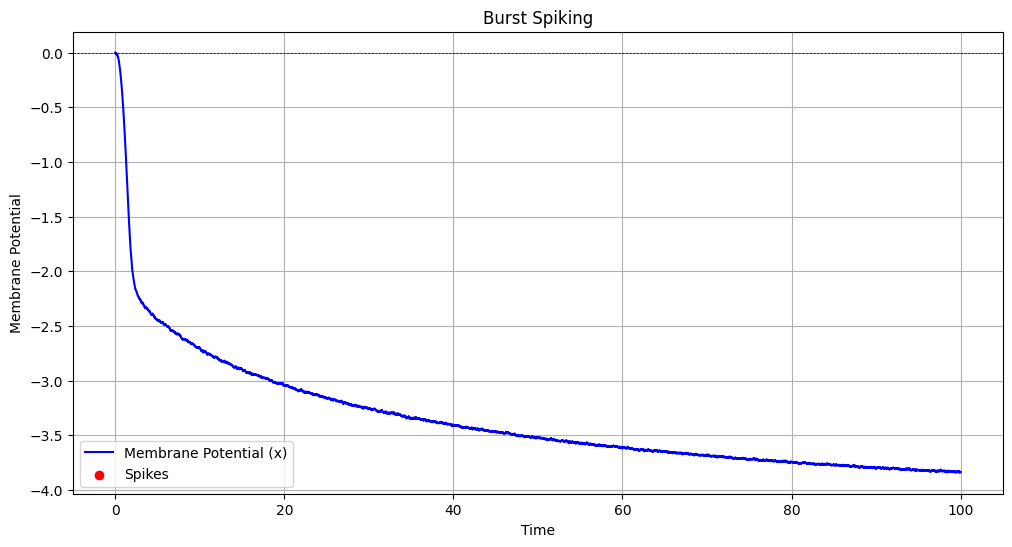

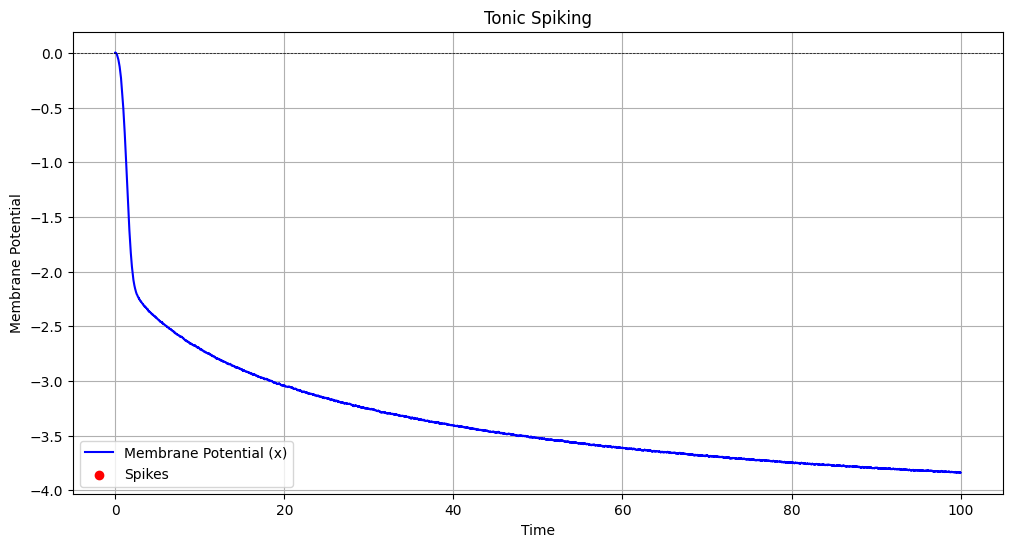

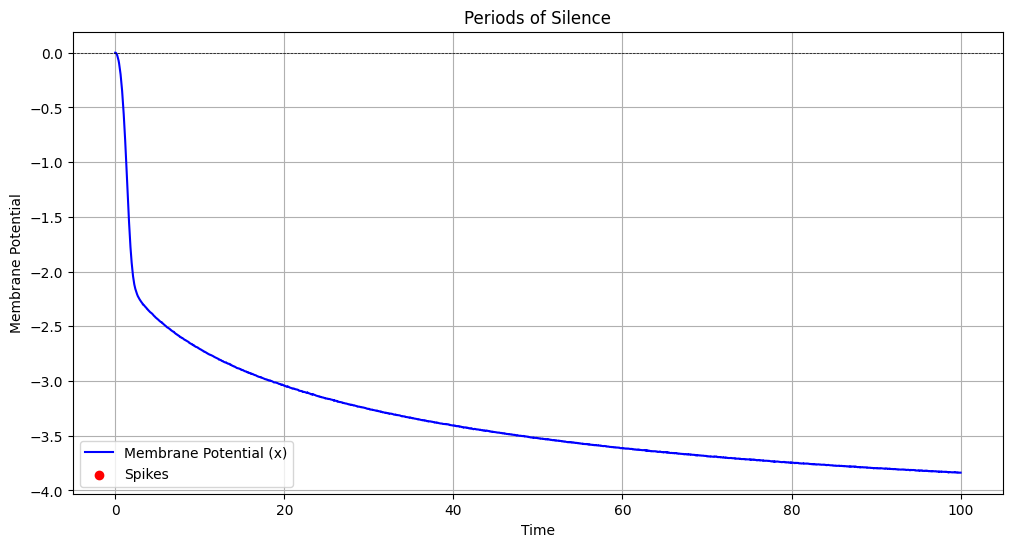

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate Rulkov neuron model
def rulkov_neuron(alpha, mu, sigma, beta, T, dt):
    # Time parameters
    t = np.arange(0, T, dt)

    # State variables
    x = np.zeros_like(t)  # Membrane potential
    y = np.zeros_like(t)  # Recovery variable
    spikes = []

    # Initial conditions
    x[0] = 0.0
    y[0] = 0.0

    for i in range(1, len(t)):
        # Update equations for the Rulkov model
        x[i] = x[i-1] + dt * (x[i-1] - (x[i-1]**3) / 3 - y[i-1] + mu + sigma * np.random.normal())
        y[i] = y[i-1] + dt * (beta * (x[i-1] + alpha))

        # Detect spikes
        if x[i] >= 1:
            spikes.append(i)
            x[i] = 0  # Reset after spike

    return t, x, spikes

# Function to plot the results
def plot_neuronal_activity(t, x, spikes, title):
    plt.figure(figsize=(12, 6))
    plt.plot(t, x, label='Membrane Potential (x)', color='blue')
    plt.scatter(t[spikes], x[spikes], color='red', label='Spikes', marker='o')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Membrane Potential')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.legend()
    plt.grid()
    plt.show()

# Empirical demonstration of different regimes
T = 100  # Total time
dt = 0.01  # Time step

# 1. Bursting Spiking
alpha_burst = 4.1
mu_burst = 0.001
sigma_burst = 0.2
beta = 0.2

t_burst, x_burst, spikes_burst = rulkov_neuron(alpha_burst, mu_burst, sigma_burst, beta, T, dt)
plot_neuronal_activity(t_burst, x_burst, spikes_burst, 'Burst Spiking')

# 2. Tonic Spiking
alpha_tonic = 4.1
mu_tonic = 0.001
sigma_tonic = 0.1

t_tonic, x_tonic, spikes_tonic = rulkov_neuron(alpha_tonic, mu_tonic, sigma_tonic, beta, T, dt)
plot_neuronal_activity(t_tonic, x_tonic, spikes_tonic, 'Tonic Spiking')

# 3. Periods of Silence
alpha_silence = 4.1
mu_silence = 0.001
sigma_silence = 0.05

t_silence, x_silence, spikes_silence = rulkov_neuron(alpha_silence, mu_silence, sigma_silence, beta, T, dt)
plot_neuronal_activity(t_silence, x_silence, spikes_silence, 'Periods of Silence')


## Acknowledgement:

I am thankful to my peer Udbhav in this course who helped me in coding and by sharing their results and discussing strategies for parameter tuning.

credits: [link](https://github.com/ShivenTripathi/CS786-Computational-Cognitive-Science/tree/main/Assignments)